# <center> <img src="figs/logounesp" alt="Logo UNESP" width="110" align="left"/> <font size="20"> <br><center>Mestrado Acadêmico<br/></p> <br><font size="4"> <br><center>Programa de Pós-Graduação em Engenharia Elétrica<br/></p><br><center>Faculdade de Engenharia de Bauru (FEB)<br/></p><br><center>Faculdade de Ciências (FC)<br/></p>

# <center>Método Híbrido Para Solução do Problema de Fluxo de Potência Ótimo Reativo Com Variáveis Discretas<br/>

#### <center><font size="4">Aluno:</center></font></p> <br><center>Rafael Pavan</center></br>

#### <center><font size="4">Orientador:</center></font></p> <br><center>Profª Drª Edilaine Martins Soler</center></br>

# <center>Implementação Computacional</center>





#### 1. Visualização de Dados do Sistema Elétrico de Potência

    1.1 IEEE 14 Barras;
    1.2 IEEE 30 Barras;
    1.3 IEEE 118 Barras;
    1.4 IEEE 300 Barras;
    
#### 2. Funções Para Manipulação e Extração de Dados do Sistema Elétrico de Potência

    2.1 Função Para Inicalizar o Sistema Elétrico;
    2.2 Função Para Calcular As Condutâncias de Linha do Sistema;
    2.3 Função Para Coletar Tensões Das Barras e Seus Respectivos Limites Inferiores e Superiores;
    2.4 Função Para Coletar Tensões e Potências Das Barras de Geração/Controle de Reativo e Seus Respectivos               Limites Inferiores e Superiores;
    2.5 Função Objetivo Para Calcular as Perdas de Potência Ativa nas Linhas de Transmissão;
    2.6 Função Para Calcular a Penalização por Ultrapassagem de Tensão;
    2.7 Função Para Calcular a Penalização por Ultrapassagem de Geração de Reativo dos Geradores;
    2.8 Função Para Coletar Dados de Carregamento e TAP dos Trafos
    2.9 Função Para Coletar Dados dos Reativos Shunt;
    2.10 Função Para Converter TAPs;
    2.11 Função Para Criar Alcateia;
    2.12 Função Para Criar Enxame;
    2.13 Função para Calcular o Fluxo de Potência;
    2.14 Função para Calcular o Fitness;
    2.15 Função para Validação (Salva Dados no SEP);
    
#### 3. Implementação de Métodos de Otimização Meta-Heurísticos
    
    3.1 Método Alcateia de Lobos Cinzentos (Gray Wolf Optimizer);
    3.2 Método Enxame de Partículas (Particle Swarm Optimization);    
    3.3 Em Andamento: Algoritmo Genético, Algoritmo GWO/PSO Híbrido
        .
        .
        .
        .
        .
        
    
#### 4. Protocolo Experimental Com Métodos Meta-Heurísticos

    4.1 Em Andamento
        .
        .
        .
        .
        .
        .
       

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandapower as pp
import time
import random
from pandapower.networks import case14, case_ieee30, case118, case300
import pandapower.plotting as pplot
import tabulate
import numba
from numba import njit

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
font = {'size'   : 13}
plt.rc('font', **font)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 



##  1. Visualização dos Dados dos Sistemas Elétricos de Potência


In [240]:
sep14 = case14()
sep30 = case_ieee30()
sep118 = case118()
sep300 = case300()

## 1.1 Sistema de 14 Barras

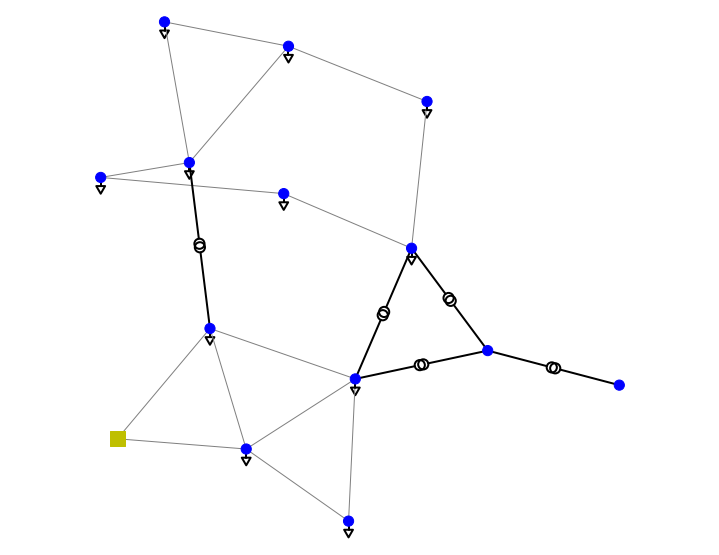

In [241]:
pplot.simple_plot(sep14,plot_loads=True)

In [242]:
pp.runpp(sep14, algorithm = 'nr')
sep14

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - poly_cost (5 elements)
   - bus_geodata (14 elements)
 and the following results tables:
   - res_bus (14 elements)
   - res_line (15 elements)
   - res_trafo (5 elements)
   - res_ext_grid (1 element)
   - res_load (11 elements)
   - res_shunt (1 element)
   - res_gen (4 elements)

In [243]:
sep14.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1
1,True,1.06,0.94,2,b,135.000,1
10,True,1.06,0.94,11,b,0.208,1
11,True,1.06,0.94,12,b,0.208,1
12,True,1.06,0.94,13,b,0.208,1
13,True,1.06,0.94,14,b,0.208,1
2,True,1.06,0.94,3,b,135.000,1
3,True,1.06,0.94,4,b,135.000,1
4,True,1.06,0.94,5,b,135.000,1
5,True,1.06,0.94,6,b,0.208,1


In [244]:
sep14.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.060000,0.000000,-232.393272,16.549301
1,1.045000,-4.982589,-18.300000,-30.857100
10,1.056907,-14.790622,3.500000,1.800000
11,1.055189,-15.075585,6.100000,1.600000
12,1.050382,-15.156276,13.500000,5.800000
13,1.035530,-16.033645,14.900000,5.000000
2,1.010000,-12.725100,94.200000,-6.075348
3,1.017671,-10.312901,47.800000,-3.900000
4,1.019514,-8.773854,7.600000,1.600000
5,1.070000,-14.220946,11.200000,-5.230944


In [245]:
sep14.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.06,332.4,0.0,10.0,0.0


In [246]:
sep14.res_ext_grid

,p_mw,q_mvar
0,232.393272,-16.549301


In [247]:
sep14.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,50.0,-40.0
1,2,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,0.0
2,5,True,True,None,0.0,1.0,NaN,None,1.070,False,100.0,0.0,24.0,-6.0
3,7,True,True,None,0.0,1.0,NaN,None,1.090,False,100.0,0.0,24.0,-6.0


In [248]:
sep14.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,40.0,43.557100,-4.982589,1.045
1,0.0,25.075348,-12.725100,1.010
2,0.0,12.730944,-14.220946,1.070
3,0.0,17.623451,-13.359627,1.090


In [249]:
sep14.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,156.882891,-20.404292,-152.585290,27.676250,4.297600,7.271958,0.638290,0.634645,0.638290,1.060000,0.000000,1.045000,-4.982589,1.507568
1,75.510382,3.854991,-72.747509,2.229359,2.762873,6.084350,0.305050,0.305305,0.305305,1.060000,0.000000,1.019514,-8.773854,0.721097
10,5.227552,4.219138,-5.214678,-4.184937,0.012875,0.034201,17.658967,17.658967,17.658967,1.055932,-14.938521,1.050985,-15.097288,0.064262
11,9.426381,3.610006,-9.310227,-3.362931,0.116154,0.247075,26.534043,26.534043,26.534043,1.055932,-14.938521,1.035530,-16.033645,0.096559
12,-3.785322,-1.615063,3.797904,1.644514,0.012581,0.029451,10.869239,10.869239,10.869239,1.050985,-15.097288,1.056907,-14.790622,0.039554
13,1.614258,0.753959,-1.607960,-0.748261,0.006298,0.005698,4.686717,4.686717,4.686717,1.055189,-15.075585,1.050382,-15.156276,0.017055
14,5.643851,1.747174,-5.589773,-1.637069,0.054078,0.110105,15.612659,15.612659,15.612659,1.050382,-15.156276,1.035530,-16.033645,0.056815
2,73.237579,3.560203,-70.914310,1.602233,2.323269,5.162436,0.300079,0.300351,0.300351,1.045000,-4.982589,1.010000,-12.725100,0.709395
3,56.131496,-1.550350,-54.454838,3.020687,1.676658,1.470337,0.229806,0.229193,0.229806,1.045000,-4.982589,1.017671,-10.312901,0.542776
4,41.516215,1.170998,-40.612462,-2.099034,0.903753,-0.928036,0.169973,0.170589,0.170589,1.045000,-4.982589,1.019514,-8.773854,0.402912


In [250]:
sep14.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
10,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000014,None,9,ol,0.000037
11,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000055,None,13,ol,0.000117
12,0.000000,1.0,9,0.0,True,1.0,27479.652235,100.0,None,1,0.000035,None,10,ol,0.000083
13,0.000000,1.0,11,0.0,True,1.0,27479.652235,100.0,None,1,0.000096,None,12,ol,0.000086
14,0.000000,1.0,12,0.0,True,1.0,27479.652235,100.0,None,1,0.000074,None,13,ol,0.000151
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630


In [251]:
sep14.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,8,None,-19.0,0.0,0.208,1,1,True


In [252]:
sep14.trafo.columns

Index(['df', 'hv_bus', 'i0_percent', 'in_service', 'lv_bus',
       'max_loading_percent', 'name', 'parallel', 'pfe_kw', 'shift_degree',
       'sn_mva', 'std_type', 'tap_max', 'tap_neutral', 'tap_min',
       'tap_phase_shifter', 'tap_pos', 'tap_side', 'tap_step_degree',
       'tap_step_percent', 'vn_hv_kv', 'vn_lv_kv', 'vk_percent',
       'vkr_percent'],
      dtype='object')

In [253]:
sep14.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,3,0.0,True,6,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,2.2,135.0,14.000,2070.288,0.0
1,1.0,3,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.1,135.0,0.208,5506.182,0.0
2,1.0,4,0.0,True,5,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.8,135.0,0.208,2494.998,0.0
3,1.0,6,0.0,True,7,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,12.000,1743.885,0.0
4,1.0,6,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,0.208,1089.099,0.0


## 1.2 Sistema de 30 Barras

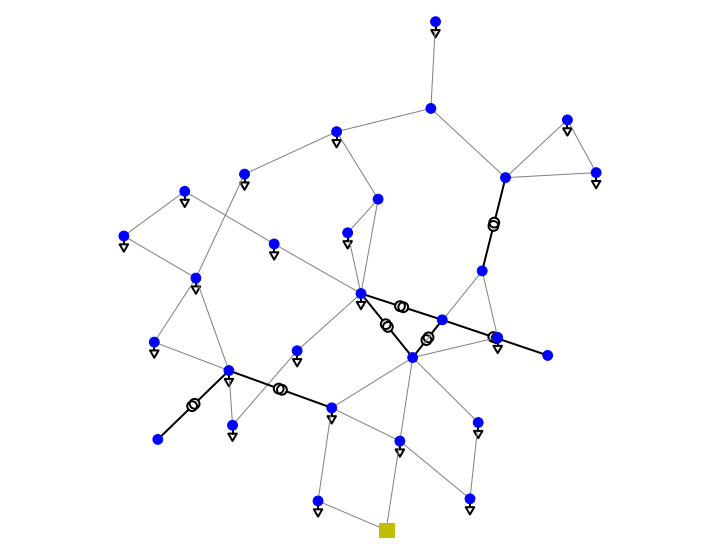

In [254]:
pplot.simple_plot(sep30,plot_loads=True)

In [255]:
pp.runpp(sep30, algorithm = 'nr')
sep30

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (21 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (34 elements)
   - trafo (7 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)
 and the following results tables:
   - res_bus (30 elements)
   - res_line (34 elements)
   - res_trafo (7 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)
   - res_shunt (2 elements)
   - res_gen (5 elements)

In [256]:
sep30.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,0,b,132.0,1
1,True,1.06,0.94,1,b,132.0,1
10,True,1.06,0.94,10,b,11.0,1
11,True,1.06,0.94,11,b,33.0,1
12,True,1.06,0.94,12,b,11.0,1
13,True,1.06,0.94,13,b,33.0,1
14,True,1.06,0.94,14,b,33.0,1
15,True,1.06,0.94,15,b,33.0,1
16,True,1.06,0.94,16,b,33.0,1
17,True,1.06,0.94,17,b,33.0,1


In [257]:
sep30.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.060000,0.000000,-260.956948,20.417883
1,1.045000,-5.378243,-18.300000,-43.369462
10,1.082000,-14.097969,0.000000,-16.057446
11,1.057339,-14.932908,11.200000,7.500000
12,1.071000,-14.932908,0.000000,-10.450719
13,1.042508,-15.824522,6.200000,1.600000
14,1.037916,-15.916363,8.200000,2.500000
15,1.044626,-15.515424,3.500000,1.800000
16,1.040150,-15.849948,9.000000,5.800000
17,1.028396,-16.530189,3.200000,0.900000


In [258]:
sep30.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,40.0,56.069462,-5.378243,1.045
1,0.0,35.658791,-14.148767,1.010
2,0.0,36.111267,-11.797385,1.010
3,0.0,16.057446,-14.097969,1.082
4,0.0,10.450719,-14.932908,1.071


In [259]:
sep30.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,40.0,-50.0
1,4,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,-40.0
2,7,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,10.0,-40.0
3,10,True,True,None,0.0,1.0,NaN,None,1.082,False,100.0,0.0,6.0,-24.0
4,12,True,True,None,0.0,1.0,NaN,None,1.071,False,100.0,0.0,6.0,-24.0


In [260]:
sep30.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,803.812844,1.0,0,0.0,True,1.0,99999.0,100.0,None,1,3.345408,None,1,ol,10.018800
1,621.128107,1.0,0,0.0,True,1.0,99999.0,100.0,None,1,7.875648,None,2,ol,28.784448
10,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,1.340559,None,13,ol,2.786751
11,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,0.720918,None,14,ol,1.420056
12,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,1.029105,None,15,ol,2.163843
13,0.000000,1.0,13,0.0,True,1.0,99999.0,100.0,None,1,2.406690,None,14,ol,2.174733
14,0.000000,1.0,15,0.0,True,1.0,99999.0,100.0,None,1,0.570636,None,16,ol,2.094147
15,0.000000,1.0,14,0.0,True,1.0,99999.0,100.0,None,1,1.168497,None,17,ol,2.379465
16,0.000000,1.0,17,0.0,True,1.0,99999.0,100.0,None,1,0.695871,None,18,ol,1.406988
17,0.000000,1.0,18,0.0,True,1.0,99999.0,100.0,None,1,0.370260,None,19,ol,0.740520


In [261]:
sep30.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,40.0,-50.0
1,4,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,-40.0
2,7,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,10.0,-40.0
3,10,True,True,None,0.0,1.0,NaN,None,1.082,False,100.0,0.0,6.0,-24.0
4,12,True,True,None,0.0,1.0,NaN,None,1.071,False,100.0,0.0,6.0,-24.0


In [262]:
sep30.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,9,None,-19.0,0.0,33.0,1,1,True
1,23,None,-4.3,0.0,33.0,1,1,True


In [263]:
sep30.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,5,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,2.2,132.0,1.0,20.799792,0.0
1,1.0,5,0.0,True,9,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.1,132.0,33.0,55.599444,0.0
2,1.0,10,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,11.0,1.0,20.799792,0.0
3,1.0,9,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,33.0,1.0,10.999890,0.0
4,1.0,3,0.0,True,11,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.8,132.0,33.0,25.599744,0.0
5,1.0,11,0.0,True,12,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,33.0,11.0,13.999860,0.0
6,1.0,27,0.0,True,26,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.2,132.0,33.0,39.599604,0.0


In [264]:
sep30.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,2.772124e+01,-8.092986,-2.772124e+01,9.717440,-7.105427e-15,1.624454,0.124982,16.134721,1.010626,-11.055023,1.051132,-14.097969,28.575087
1,1.583966e+01,0.186541,-1.583966e+01,1.096066,1.776357e-15,1.282607,0.068557,0.265726,1.010626,-11.055023,1.045379,-15.688173,15.674365
2,-6.661338e-15,16.057446,6.661338e-15,-15.599344,0.000000e+00,0.458102,0.778925,8.568180,1.082000,-14.097969,1.051132,-14.097969,14.840672
3,-2.772124e+01,-5.082386,2.772124e+01,5.881905,-3.552714e-15,0.799519,0.471676,15.565294,1.045379,-15.688173,1.051132,-14.097969,26.960150
4,4.419322e+01,14.410000,-4.419322e+01,-9.721377,1.421085e-14,4.688622,0.200841,0.748735,1.012300,-9.279432,1.057339,-14.932908,45.918856
5,1.065814e-13,-10.317415,-1.070255e-13,10.450719,-4.440892e-16,0.133303,0.170719,0.512157,1.057339,-14.932908,1.071000,-14.932908,9.758005
6,1.806888e+01,5.036015,-1.806888e+01,-3.748796,1.065814e-14,1.287219,0.081465,0.315431,1.007101,-11.677297,1.023539,-15.530080,18.625485


## 1.3 Sistema de 118 Barras

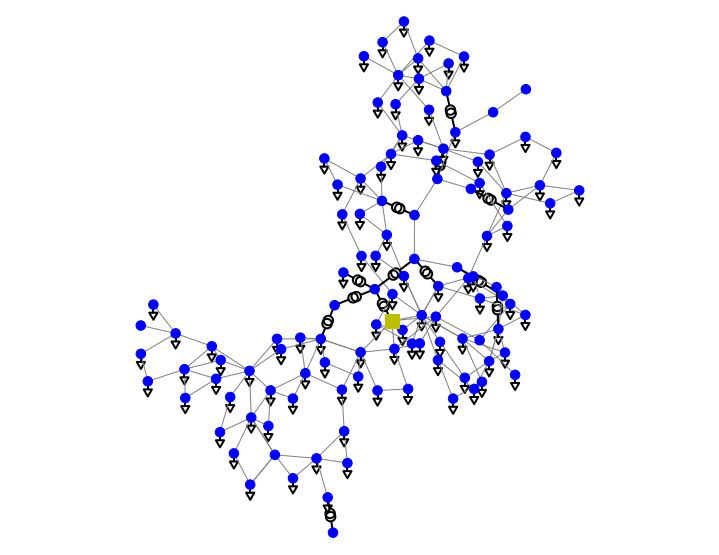

In [265]:
pplot.simple_plot(sep118,plot_loads=True)

In [266]:
pp.runpp(sep118, algorithm = 'nr')

sep118

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (53 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)
   - bus_geodata (118 elements)
 and the following results tables:
   - res_bus (118 elements)
   - res_line (173 elements)
   - res_trafo (13 elements)
   - res_ext_grid (1 element)
   - res_load (99 elements)
   - res_shunt (14 elements)
   - res_gen (53 elements)

In [267]:
sep118.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,138.0,1
1,True,1.06,0.94,2,b,138.0,1
10,True,1.06,0.94,11,b,138.0,1
100,True,1.06,0.94,101,b,138.0,1
101,True,1.06,0.94,102,b,138.0,1
...,...,...,...,...,...,...,...
95,True,1.06,0.94,96,b,138.0,1
96,True,1.06,0.94,97,b,138.0,1
97,True,1.06,0.94,98,b,138.0,1
98,True,1.06,0.94,99,b,138.0,1


In [268]:
sep118.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,0.955000,10.972367,51.0,30.104097
1,0.971393,11.512175,20.0,9.000000
10,0.985089,13.005428,70.0,23.000000
100,0.991420,29.645192,22.0,15.000000
101,0.989131,32.363302,5.0,3.000000
...,...,...,...,...
95,0.992283,27.540933,38.0,15.000000
96,1.011166,27.914135,15.0,9.000000
97,1.023509,27.431610,34.0,8.000000
98,1.010000,27.065051,42.0,17.535596


In [269]:
sep118.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,True,None,0.0,1.0,NaN,None,0.955,False,100.0,0.0,15.0,-5.0
1,3,True,True,None,0.0,1.0,NaN,None,0.998,False,100.0,0.0,300.0,-300.0
10,24,True,True,None,220.0,1.0,NaN,None,1.050,False,320.0,0.0,140.0,-47.0
11,25,True,True,None,314.0,1.0,NaN,None,1.015,False,414.0,0.0,1000.0,-1000.0
12,26,True,True,None,0.0,1.0,NaN,None,0.968,False,100.0,0.0,300.0,-300.0
13,30,True,True,None,7.0,1.0,NaN,None,0.967,False,107.0,0.0,300.0,-300.0
14,31,True,True,None,0.0,1.0,NaN,None,0.963,False,100.0,0.0,42.0,-14.0
15,33,True,True,None,0.0,1.0,NaN,None,0.984,False,100.0,0.0,24.0,-8.0
16,35,True,True,None,0.0,1.0,NaN,None,0.980,False,100.0,0.0,24.0,-8.0
17,39,True,True,None,0.0,1.0,NaN,None,0.970,False,100.0,0.0,300.0,-300.0


In [270]:
sep118.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,353.789081,1.0,0,0.0,True,1.0,41.418606,100.0,None,1,5.770332,None,1,ol,19.024956
1,150.708577,1.0,0,0.0,True,1.0,41.418606,100.0,None,1,2.456676,None,2,ol,8.074656
10,69.922094,1.0,10,0.0,True,1.0,41.418606,100.0,None,1,1.133118,None,11,ol,3.732624
100,122.294021,1.0,69,0.0,True,1.0,41.418606,100.0,None,1,1.679681,None,70,ol,6.760620
101,679.720754,1.0,23,0.0,True,1.0,41.418606,100.0,None,1,9.293472,None,71,ol,37.326240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,373.567841,1.0,65,0.0,True,1.0,41.418606,100.0,None,1,4.265856,None,66,ol,19.329660
96,987.823686,1.0,46,0.0,True,1.0,41.418606,100.0,None,1,16.073136,None,68,ol,52.904232
97,1153.296689,1.0,48,0.0,True,1.0,41.418606,100.0,None,1,18.758340,None,68,ol,61.702560
98,1699.301885,1.0,68,0.0,True,1.0,41.418606,100.0,None,1,5.713200,None,69,ol,24.185880


In [271]:
sep118.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,4,None,40.0,0.0,138.0,1,1,True
1,33,None,-14.0,0.0,138.0,1,1,True
10,82,None,-10.0,0.0,138.0,1,1,True
11,104,None,-20.0,0.0,138.0,1,1,True
12,106,None,-6.0,0.0,138.0,1,1,True
13,109,None,-6.0,0.0,138.0,1,1,True
2,36,None,25.0,0.0,138.0,1,1,True
3,43,None,-10.0,0.0,138.0,1,1,True
4,44,None,-10.0,0.0,138.0,1,1,True
5,45,None,-10.0,0.0,138.0,1,1,True


In [272]:
sep118.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,7,0.000000,True,4,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.5,345.0,138.0,264.330000,0.000
1,1.0,25,0.000000,True,24,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,378.180000,0.000
10,1.0,80,0.000000,True,79,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,366.300000,0.000
11,1.0,86,-0.044949,True,85,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,161.0,138.0,2072.259865,279.972
12,1.0,115,-0.165657,True,67,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,345.0,161.0,40.236041,3.366
2,1.0,29,0.000000,True,16,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,384.120000,0.000
3,1.0,37,0.000000,True,36,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,371.250000,0.000
4,1.0,62,0.000000,True,58,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,382.140000,0.000
5,1.0,63,0.000000,True,60,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.5,345.0,138.0,265.320000,0.000
6,1.0,64,0.000000,True,65,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,366.300000,0.000


## 1.4 Sistema de 300 Barras

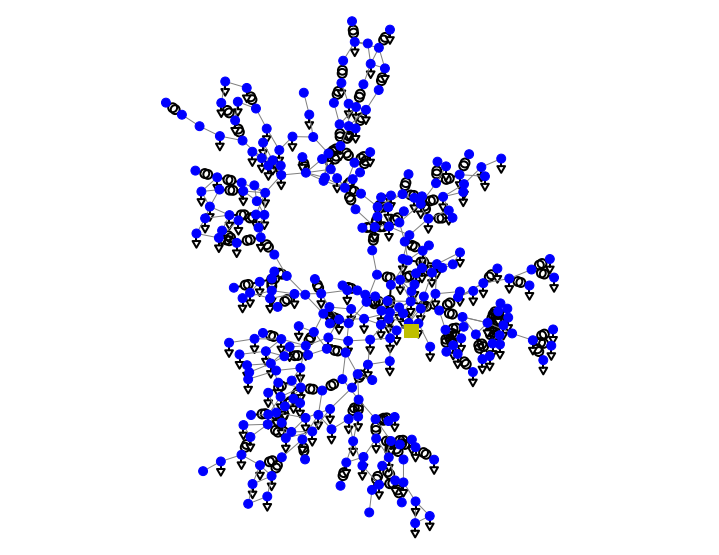

In [273]:
pplot.simple_plot(sep300,plot_loads=True)

In [274]:
pp.runpp(sep300, algorithm = 'nr')
sep300

This pandapower network includes the following parameter tables:
   - bus (300 elements)
   - load (193 elements)
   - sgen (8 elements)
   - gen (68 elements)
   - shunt (29 elements)
   - ext_grid (1 element)
   - line (283 elements)
   - trafo (128 elements)
   - poly_cost (69 elements)
   - bus_geodata (300 elements)
 and the following results tables:
   - res_bus (300 elements)
   - res_line (283 elements)
   - res_trafo (128 elements)
   - res_ext_grid (1 element)
   - res_load (193 elements)
   - res_sgen (8 elements)
   - res_shunt (29 elements)
   - res_gen (68 elements)

In [275]:
sep300.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,115.0,1
1,True,1.06,0.94,2,b,115.0,1
10,True,1.06,0.94,11,b,115.0,1
100,True,1.06,0.94,122,b,115.0,1
101,True,1.06,0.94,123,b,115.0,1
...,...,...,...,...,...,...,...
95,True,1.06,0.94,117,b,115.0,1
96,True,1.06,0.94,118,b,115.0,1
97,True,1.06,0.94,119,b,115.0,1
98,True,1.06,0.94,120,b,115.0,1


In [276]:
sep300.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.028422,5.970424,90.0,49.000000
1,1.035342,7.758020,56.0,15.000000
10,1.005658,2.484330,83.0,21.000000
100,0.972870,-14.276601,229.1,11.800000
101,1.000605,-17.545382,78.0,1.400000
...,...,...,...,...
95,0.934883,-4.634095,0.0,-284.052244
96,0.929904,-4.036511,14.1,650.000000
97,1.043500,5.252275,-1930.0,-1050.391640
98,0.958444,-8.683876,777.0,164.476158


In [277]:
sep300.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,79.632490,8.729184,-79.628729,-8.700351,3.760761e-03,0.028833,0.394237,0.397469,1.020160,-11.212013,1.011776,-11.232220,0.799700
1,26.434711,10.363424,-26.255174,-7.147937,1.795378e-01,3.215486,0.140889,2.373381,1.011776,-11.232220,1.002926,-17.409715,0.283466
10,0.470372,0.170390,-0.468615,-0.160000,1.756844e-03,0.010390,0.044899,0.493891,0.974704,-19.371074,0.964756,-20.432245,0.005185
100,47.034472,15.377642,-46.416485,-10.362441,6.179868e-01,5.015201,0.244762,0.414058,1.015000,-20.090853,1.004773,-25.610838,0.492456
101,127.433629,64.439712,-126.837784,-62.016609,5.958448e-01,2.423102,0.589612,0.707534,1.013262,-22.199618,1.001821,-22.968041,1.423544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84.818942,109.701558,-84.679860,-103.338526,1.390827e-01,6.363032,0.224014,0.551635,1.035904,-20.577454,1.013262,-22.199618,1.352135
96,-4.129472,-9.031409,4.129472,9.268715,0.000000e+00,0.237306,0.052142,0.090853,0.956174,-25.363581,0.977000,-24.806375,0.104908
97,44.760484,17.816593,-44.760484,-15.362379,-2.131628e-14,2.454215,0.251238,0.425012,0.962693,-26.468419,0.974024,-29.230211,0.505485
98,26.768681,16.740224,-26.768681,-15.468957,-1.421085e-14,1.271267,0.158218,0.272953,1.001821,-22.968041,0.990839,-24.965951,0.318331


In [278]:
sep300.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,0.0,9.839253,2.418345,1.0153
1,0.0,20.001949,1.366269,1.0205
10,1930.0,1050.391640,5.252275,1.0435
11,240.0,119.823333,-13.398031,1.0233
12,0.0,199.152215,-18.335631,1.0103
...,...,...,...,...
66,50.0,22.003472,-6.809724,1.0000
67,8.0,4.072075,-7.520736,1.0000
7,290.0,30.961223,-6.241003,1.0520
8,68.0,-10.693621,-14.661849,1.0000


In [279]:
sep300.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,7,True,True,None,0.0,1.0,NaN,None,1.0153,False,100.0,0.0,10.0,-10.0
1,9,True,True,None,0.0,1.0,NaN,None,1.0205,False,100.0,0.0,20.0,-20.0
10,97,True,True,None,1930.0,1.0,NaN,None,1.0435,False,2030.0,0.0,1500.0,-500.0
11,102,True,True,None,240.0,1.0,NaN,None,1.0233,False,340.0,0.0,120.0,-60.0
12,103,True,True,None,0.0,1.0,NaN,None,1.0103,False,100.0,0.0,200.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,294,True,True,None,50.0,1.0,NaN,None,1.0000,False,150.0,0.0,38.0,-38.0
67,295,True,True,None,8.0,1.0,NaN,None,1.0000,False,108.0,0.0,6.0,-6.0
7,76,True,True,None,290.0,1.0,NaN,None,1.0520,False,390.0,0.0,153.0,-153.0
8,79,True,True,None,68.0,1.0,NaN,None,1.0000,False,168.0,0.0,56.0,-30.0


In [280]:
sep300.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,265,0.0,True,1.0,49.702328,100.0,None,1,0.105800,None,269,ol,0.460230
1,0.000000,1.0,270,0.0,True,1.0,866.025404,100.0,None,1,0.024211,None,271,ol,0.107445
10,0.000000,1.0,290,0.0,True,1.0,866.025404,100.0,None,1,0.016692,None,268,ol,0.012606
100,250.716672,1.0,61,0.0,True,1.0,24.851164,100.0,None,1,2.116000,None,72,ol,14.283000
101,1900.432370,1.0,61,0.0,True,1.0,24.851164,100.0,None,1,15.129400,None,239,ol,106.487700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,942.694685,1.0,58,0.0,True,1.0,49.702328,100.0,None,1,4.496500,None,60,ol,13.092750
96,220.630671,1.0,59,0.0,True,1.0,49.702328,100.0,None,1,2.380500,None,63,ol,11.505750
97,0.000000,1.0,59,0.0,True,1.0,49.702328,100.0,None,1,3.385600,None,237,ol,25.524250
98,601.720012,1.0,60,0.0,True,1.0,49.702328,100.0,None,1,2.777250,None,62,ol,7.538250


In [43]:
sep300.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,36.202230,-6.457857,-36.191662,6.503828,0.010568,0.045971,0.182471,0.182471,0.182471,1.011776,-11.232220,1.011713,-11.305629,0.367128
1,9.469407,2.654983,-9.415964,-2.417807,0.053443,0.237176,0.857791,0.857791,0.857791,1.002926,-17.409715,0.991389,-18.670740,0.099049
10,4.390201,1.568983,-4.381511,-1.562420,0.008690,0.006563,0.416576,0.416576,0.416576,0.979010,-19.767690,0.976828,-19.807789,0.048102
100,-78.799121,-59.387539,79.179689,56.897091,0.380569,-2.490448,0.248562,0.241076,0.248562,0.996487,-21.939344,1.015248,-20.863255,1.000201
101,51.263134,-14.161047,-50.500000,-17.400000,0.763134,-31.561047,0.133972,0.137134,0.137134,0.996487,-21.939344,0.977727,-27.940515,0.551822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-60.658194,22.823473,62.185315,-22.876933,1.527121,-0.053460,0.332221,0.340272,0.340272,0.979390,-29.840986,0.977610,-25.733671,0.684620
96,-49.338302,-5.036021,49.808273,6.258154,0.469971,1.222133,0.256790,0.256179,0.256790,0.969614,-27.437693,0.983787,-24.907472,0.516655
97,14.056126,2.923134,-14.000000,-2.500000,0.056126,0.423134,0.074336,0.074336,0.074336,0.969614,-27.437693,0.960470,-29.060896,0.149563
98,27.504332,13.295036,-27.290443,-15.539693,0.213889,-2.244656,0.156882,0.163689,0.163689,0.977610,-25.733671,0.963200,-26.499423,0.329338


In [44]:
sep300.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,95,None,-325.00,0.00,115.0,1,1,True
1,98,None,-55.00,0.00,115.0,1,1,True
10,218,None,140.00,0.00,230.0,1,1,True
11,226,None,-45.60,0.00,66.0,1,1,True
12,267,None,-2.40,0.14,6.6,1,1,True
13,274,None,0.00,0.08,0.6,1,1,True
14,276,None,0.00,0.07,0.6,1,1,True
15,277,None,0.00,0.02,0.6,1,1,True
16,278,None,0.00,0.02,0.6,1,1,True
17,279,None,0.00,0.10,0.6,1,1,True


In [45]:
sep300.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,30,0.000000,True,265,100.0,None,1,0.0,0.0,...,NaN,False,1.0,hv,NaN,0.82,115.0,115.0,4.592576,0.594
1,1.0,265,0.000000,True,270,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.32,115.0,6.6,4331.253785,241.461
10,1.0,275,0.000000,True,277,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,6.6,0.6,39599.832856,6602.112
100,1.0,176,0.000000,True,187,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,3.00,115.0,66.0,2104.699021,257.400
101,1.0,190,0.000000,True,189,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,138.0,115.0,124.378046,29.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,173,0.000000,True,190,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.50,345.0,138.0,362.426547,7.920
96,1.0,178,0.000000,True,226,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,115.0,66.0,2178.000000,0.000
97,1.0,56,0.000000,True,179,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,3.00,115.0,66.0,970.200000,0.000
98,1.0,189,0.000000,True,180,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,1.00,115.0,66.0,1267.200000,0.000


## 2. Funções Para Manipulação e Extração de Dados do Sistema Elétrico de Potência

## 2.1 Função Para Inicializar o Sistema Elétrico de Potência

Para se coletar alguns dados iniciais do sistema elétrico é necessário realizar um cálculo de fluxo de carga preliminar neste.

In [237]:
def inicializa_sep(sep, algorithm, relatorio):
    
    """"
    
    Função Para Inicializar os Sistemas com Dados Retirados de Outros Trabalhos Para Efeitos de Comparação
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    sep : sistema elétrico de potência carregado pelo pandapower.
    algorithm : algoritmo de solução do fluxo de potência pelo pandapower. Opções:
    
    

        “nr” Newton-Raphson (pypower implementation with numba accelerations)

        “iwamoto_nr” Newton-Raphson with Iwamoto multiplier (maybe slower than NR but more robust)

        “bfsw” backward/forward sweep (specially suited for radial and weakly-meshed networks)

        “gs” gauss-seidel (pypower implementation)

        “fdbx” fast-decoupled (pypower implementation)

        “fdxb” fast-decoupled (pypower implementation)
        
        https://pandapower.readthedocs.io/en/v2.4.0/powerflow/ac.html


    relatorio : caso relatorio = True, retorna relatório informando que o sistema foi carregado e o tempo de execução do algoritmo.
                caso relatorio = False, não retorna nada.
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    """
    
    if len(sep.bus)==14:
        
        sep.bus['min_vm_pu'] = 0.95
        sep.bus['max_vm_pu'] = 1.05
        sep.ext_grid['vm_pu'] = 1.05
        
      
        
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)

        
    if len(sep.bus)==30:
        
        sep.bus['min_vm_pu'] = 0.95
        sep.bus['max_vm_pu'] = 1.05
        sep.ext_grid['vm_pu'] = 1.05
        
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)
                
    if len(sep.bus)==118:
        
        sep.bus['min_vm_pu'] = 0.90
        sep.bus['max_vm_pu'] = 1.10
        sep.ext_grid['vm_pu'] = 1.10

        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)

                    
    if len(sep.bus)==300:
        
        sep.bus['min_vm_pu'] = 0.90
        sep.bus['max_vm_pu'] = 1.10
        sep.ext_grid['vm_pu'] = 1.10
    
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)

    return 'Sistemas Inicializados'
    

### Teste

In [238]:
inicializa_sep(sep30,algorithm='nr', relatorio=True)
print('')
inicializa_sep(sep14,algorithm='iwamoto_nr', relatorio=True)
print('')
inicializa_sep(sep14,algorithm='gs', relatorio=True)
print('')
inicializa_sep(sep14,algorithm='fdbx', relatorio=True)
print('')
inicializa_sep(sep14,algorithm='fdxb', relatorio=True)
print('')


Algoritmo:  nr
Tempo de Execução:  0.014342069625854492

Algoritmo:  iwamoto_nr
Tempo de Execução:  0.009608030319213867

Algoritmo:  gs
Tempo de Execução:  0.009115219116210938

Algoritmo:  fdbx
Tempo de Execução:  0.014975786209106445

Algoritmo:  fdxb
Tempo de Execução:  0.01479339599609375



## 2.2 Função Para Calcular as Condutâncias de Linha do Sistema

A matriz de condutâncias do sistema é importante para, posteriormente, calcular as perdas nas linhas.

In [216]:
def matriz_condutancia(sep,relatorio=True):
    
    '''
    
    Calcula a matriz de condutâncias de linha, retornando apenas a parte triangular superior.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando barras de origem e destino das linhas, resistências (pu), reatâncias (pu).
                caso relatorio = False, retorna apenas a parte triangular superior da matriz de condutâncias.
    Retorno
    -------    
    matriz_g: matriz de condutâncias entre barras com triângulo inferior zerado.
    
    Observações:
    ------------
    
    Potência Aparente de Base = 100 MVA
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    
    '''
    
    sep.line=sep.line.sort_index()
   
    sep.bus=sep.bus.sort_index()
    
    vbus = sep.bus.vn_kv.to_numpy(dtype=np.float64)
    
    zbase = np.power(np.multiply(vbus,1000), 2)/100e6
    
    # Inicializa Matriz Zerada
    
    matriz_z = np.zeros((4,len(sep.line.index.ravel())),dtype=np.float64)
    
    matriz_g = np.zeros((sep.bus.name.count(),sep.bus.name.count()), dtype=np.float64)
    
    g = np.zeros(len(sep.line.index.ravel()),dtype=np.float64)
    
    # Pega Valores de Barra Origem e Destino das Linhas
        
    matriz_z[0,:]=sep.line.from_bus
    
    matriz_z[1,:]=sep.line.to_bus
    
    
    for i in range(len(sep.line.index.ravel())):    
    
        matriz_z[2,i] = sep.line.r_ohm_per_km[i]/zbase[int(matriz_z[0,i])]
        matriz_z[3,i] = sep.line.x_ohm_per_km[i]/zbase[int(matriz_z[0,i])]
    
    # Calcula Condutâncias
    
    g = np.array(np.divide(matriz_z[2,:], np.power(matriz_z[2,:],2)+np.power(matriz_z[3],2)))
    z = np.sqrt(np.power(matriz_z[2,:],2) + np.power(matriz_z[3,:],2))
    b = np.array(np.divide(matriz_z[3,:], np.power(matriz_z[2,:],2)+np.power(matriz_z[3],2)))

    # Gera Matriz
    
    for posicao in range(len(sep.line.index.ravel())):
        
        matriz_g[matriz_z[0,posicao].astype(np.int),matriz_z[1,posicao].astype(np.int)] = g[posicao]
        
    
    if relatorio==True:
    
        tabela = np.zeros((len(sep.line.index.ravel()),7))
        tabela[:,0] = matriz_z[0,:]
        tabela[:,1] = matriz_z[1,:]
        tabela[:,2] = matriz_z[2,:]
        tabela[:,3] = matriz_z[3,:]
        tabela[:,4] = z
        tabela[:,5] = g
        tabela[:,6] = b

        table = tabulate.tabulate(tabela, headers = ['Barra de Origem', 'Barra de Destino','R (pu)','Xl (pu)','Z (pu)', 'G (pu)','B (pu)'], tablefmt="psql")
        print(table)
        
        if len(sep.bus)==14:

            sns.heatmap(matriz_condutancia(sep,relatorio=False)+matriz_condutancia(sep,relatorio=False).T,annot=True,fmt='.6g',cmap='jet')
            plt.xlabel('Barra Origem')
            plt.ylabel('Barra Destino')
            plt.title('Matriz de Condutâncias de Linha Completa')

        
    if relatorio==False:
        
        return matriz_g


### Teste

+-------------------+--------------------+----------+-----------+-----------+----------+----------+
|   Barra de Origem |   Barra de Destino |   R (pu) |   Xl (pu) |    Z (pu) |   G (pu) |   B (pu) |
|-------------------+--------------------+----------+-----------+-----------+----------+----------|
|                 0 |                  1 |  0.01938 |   0.05917 | 0.0622629 |  4.99913 | 15.2631  |
|                 0 |                  4 |  0.05403 |   0.22304 | 0.229491  |  1.0259  |  4.23498 |
|                 1 |                  2 |  0.04699 |   0.19797 | 0.20347   |  1.13502 |  4.78186 |
|                 1 |                  3 |  0.05811 |   0.17632 | 0.185649  |  1.68603 |  5.11584 |
|                 1 |                  4 |  0.05695 |   0.17388 | 0.182969  |  1.70114 |  5.19393 |
|                 2 |                  3 |  0.06701 |   0.17103 | 0.183689  |  1.98598 |  5.06882 |
|                 3 |                  4 |  0.01335 |   0.04211 | 0.0441755 |  6.84098 | 21.5786  |


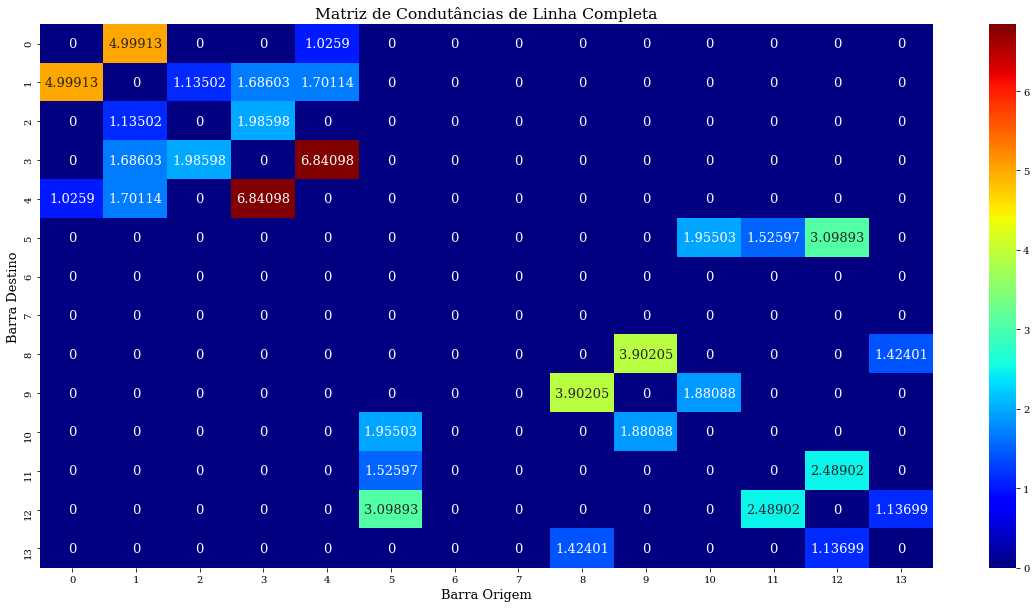

In [219]:
matriz_condutancia(sep14,relatorio=True)

## 2.3 Função Para Coletar Tensões Das Barras e Seus Respectivos Limites Inferiores e Superiores

As tensões nas barras são importantes para se calcular as perdas nas linhas, e os limites inferiores e superiores para garantir que as estas estejam nos níveis adequados.

In [50]:
def coleta_dados_vbus(sep,relatorio=True):
    
   
    '''
    
    Coleta os Dados de Tensões e Limites Superiores e Inferiores das Barras do Sistema.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando, tensões, ângulos e limites.
                caso relatorio = False, retorna apenas as tensões, ângulos e limtes
    
    Retorno
    ----------
    vbus : vetor de tensões [pu] das barras em ordem crescente do número da barra
    theta : vetor de ângulo de tensões [°]
    v_lim_superior : 
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    sep.res_bus=sep.res_bus.sort_index()
    
    sep.bus=sep.bus.sort_index()
      
    vbus = sep.res_bus['vm_pu'].to_numpy(dtype=np.float64)
    
    theta = sep.res_bus['va_degree'].to_numpy(dtype=np.float64)
    
    v_lim_superior = sep.bus["max_vm_pu"].to_numpy(dtype=np.float32)
    
    v_lim_inferior = sep.bus["min_vm_pu"].to_numpy(dtype=np.float32)

    
    
    if relatorio==True:
        
        tabela = np.zeros((len(vbus),4))
        tabela[:,0] = vbus
        tabela[:,1] = theta
        tabela[:,2] = v_lim_inferior
        tabela[:,3] = v_lim_superior

        table = tabulate.tabulate(tabela, headers = ['Tensões nas Barras (pu)', 'Ângulos das Barras (°)','Limites Inferiores','Limites Superiores'], tablefmt="psql")
        print(table)
    
        sns.scatterplot(x=np.arange(0,len(vbus),1),y=vbus,color='blue',label='Módulo da Tensão',s=75)
        sns.lineplot(x=np.arange(0,len(vbus),1),y=v_lim_superior,color='red',label='Limite Superior',alpha=0.5)
        sns.lineplot(x=np.arange(0,len(vbus),1),y=v_lim_inferior,color='orange',label='Limite Inferior',alpha=0.5)
        plt.grid()
        plt.title('Módulo da Tensão por Barra do Sistema')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Tensão [pu]')
        plt.legend(loc='best')
        plt.figure(figsize=(16,10))
        sns.scatterplot(x=np.arange(0,len(theta),1),y=theta,color='green',label='Ângulo da Tensão',s=75)
        plt.grid()
        plt.title('Ângulo da Tensão por Barra do Sistema')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Theta [°]')
        plt.legend(loc='best')
        
    
    if relatorio==False:
        
        return vbus, theta, v_lim_superior, v_lim_inferior
    
    

### Teste

+---------------------------+--------------------------+----------------------+----------------------+
|   Tensões nas Barras (pu) |   Ângulos das Barras (°) |   Limites Inferiores |   Limites Superiores |
|---------------------------+--------------------------+----------------------+----------------------|
|                  0.955    |                 10.9724  |                  0.9 |                  1.1 |
|                  0.971393 |                 11.5122  |                  0.9 |                  1.1 |
|                  0.967692 |                 11.8558  |                  0.9 |                  1.1 |
|                  0.998    |                 15.5737  |                  0.9 |                  1.1 |
|                  1.00198  |                 16.0188  |                  0.9 |                  1.1 |
|                  0.99     |                 13.2915  |                  0.9 |                  1.1 |
|                  0.989328 |                 12.847   |                 

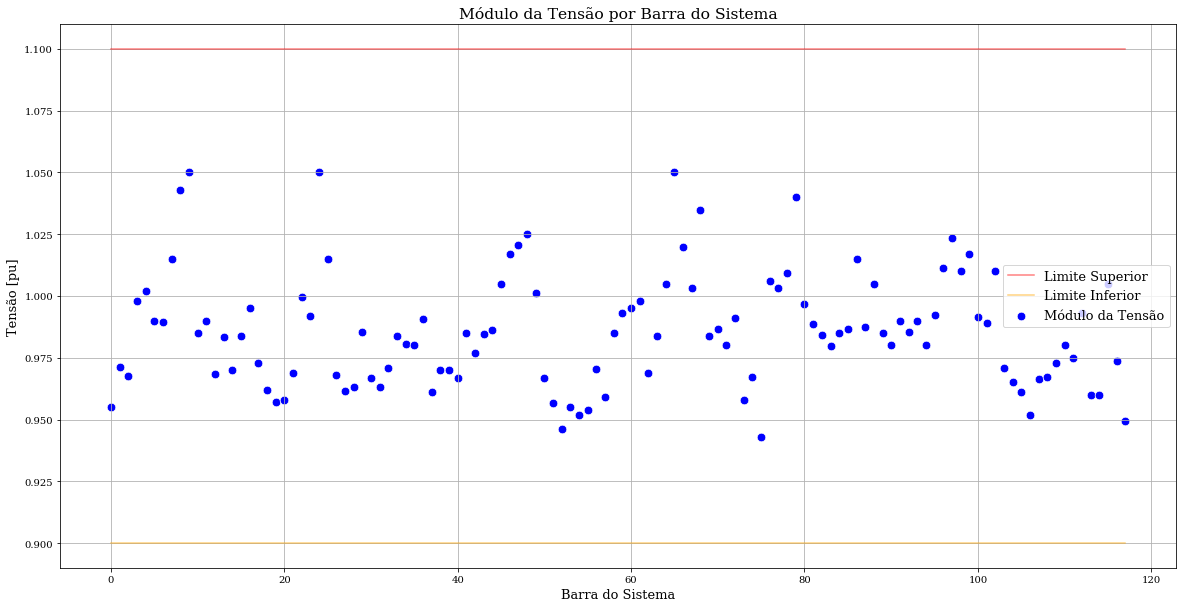

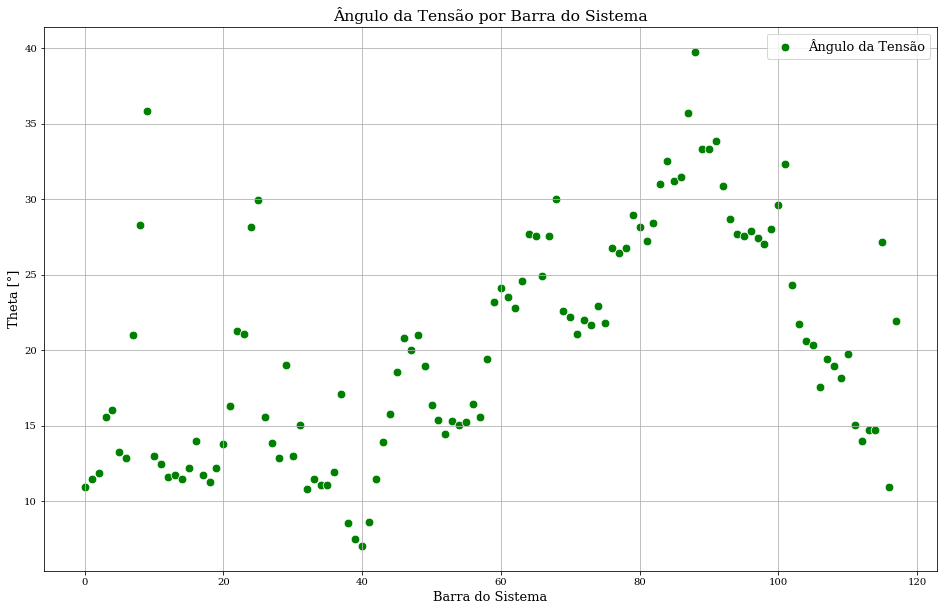

In [51]:
coleta_dados_vbus(sep118,relatorio=True)

## 2.4 Função Para Coletar Tensões e Potências Das Barras de Geração/Controle de Reativo e Seus Respectivos Limites Inferiores e Superiores

In [52]:
def coleta_dados_gen(sep,relatorio=True):
       
    '''
    
    Coleta os Dados de Tensões, Potências Ativa e Reativa e Seus Respectivos Limites Superiores e Inferiores de geração.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando, limites, potências e gráficos.
                caso relatorio = False, retorna apenas as tensões, ângulos, potências e limites.
    
    Retorno
    ----------
    vgen : vetor de tensões [pu] das barras de geração
    theta : vetor de ângulo de tensões [°] das barras de geração
    p_lim_superior : Limite Superior de Potência Ativa (pu)
    p_lim_inferior : Limite Inferior de Potência Ativa (pu)
    q_lim_superior : Limite Superior de Potência Reativa (pu)
    q_lim_inferior : Limite Inferior de Potência Ativa (pu)
    
    Observações:
    - - - - - - -
    
    Potência Aparente de Base : 100 MVA
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    sep.res_gen=sep.res_gen.sort_index()
    
    sep.gen=sep.gen.sort_index()
      
    vgen = sep.res_gen['vm_pu'].to_numpy(dtype=np.float64)
    
    barra = sep.gen['bus'].to_numpy(dtype=np.float64)
    
    thetagen = sep.res_gen['va_degree'].to_numpy(dtype=np.float64)
    
    pgen = sep.res_gen['p_mw'].to_numpy(dtype=np.float64)/100
    
    qgen = sep.res_gen['q_mvar'].to_numpy(dtype=np.float64)/100
    
    p_lim_superior = sep.gen["max_p_mw"].to_numpy(dtype=np.float32)/100
    
    p_lim_inferior = sep.gen["min_p_mw"].to_numpy(dtype=np.float32)/100
    
    q_lim_superior = sep.gen["max_q_mvar"].to_numpy(dtype=np.float32)/100
    
    q_lim_inferior = sep.gen["min_q_mvar"].to_numpy(dtype=np.float32)/100

    
    if relatorio==True:
        
        tabela = np.zeros((len(vgen),6))
        tabela[:,0] = pgen
        tabela[:,1] = p_lim_superior
        tabela[:,2] = p_lim_inferior
        tabela[:,3] = qgen
        tabela[:,4] = q_lim_superior
        tabela[:,5] = q_lim_inferior


        table = tabulate.tabulate(tabela, headers = ['P (pu)','P Lim. Sup. (pu)','P Lim. Inf. (pu)','Q (pu)','Q Lim. Sup. (pu)','Q Lim. Inf. (pu)'], tablefmt="psql")
        print(table)
    

        sns.scatterplot(x=barra,y=qgen,color='blue',label='Potência Gerada',s=75)
        sns.lineplot(x=barra,y=q_lim_superior,color='red',label='Limite Superior',alpha=0.5)
        sns.lineplot(x=barra,y=q_lim_inferior,color='orange',label='Limite Inferior',alpha=0.5)
        plt.grid()
        plt.title('Potência Reativa Gerada')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Potência Reativa (pu)')
        plt.legend(loc='best')
        
    
    if relatorio==False:
        
        return vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra
    
    

### Teste

+----------+--------------------+--------------------+-------------+--------------------+--------------------+
|   P (pu) |   P Lim. Sup. (pu) |   P Lim. Inf. (pu) |      Q (pu) |   Q Lim. Sup. (pu) |   Q Lim. Inf. (pu) |
|----------+--------------------+--------------------+-------------+--------------------+--------------------|
|     0    |               1    |                  0 |   2.06156   |               0.15 |              -0.05 |
|     0    |               1    |                  0 |   6.31842   |               3    |              -3    |
|     0    |               1    |                  0 |   3.41023   |               0.5  |              -0.13 |
|     0    |               1    |                  0 |  -4.29533   |               3    |              -3    |
|     4.5  |               5.5  |                  0 |  -0.706845  |               2    |              -1.47 |
|     0.85 |               1.85 |                  0 |  -4.38329   |               1.2  |              -0.35 |
|

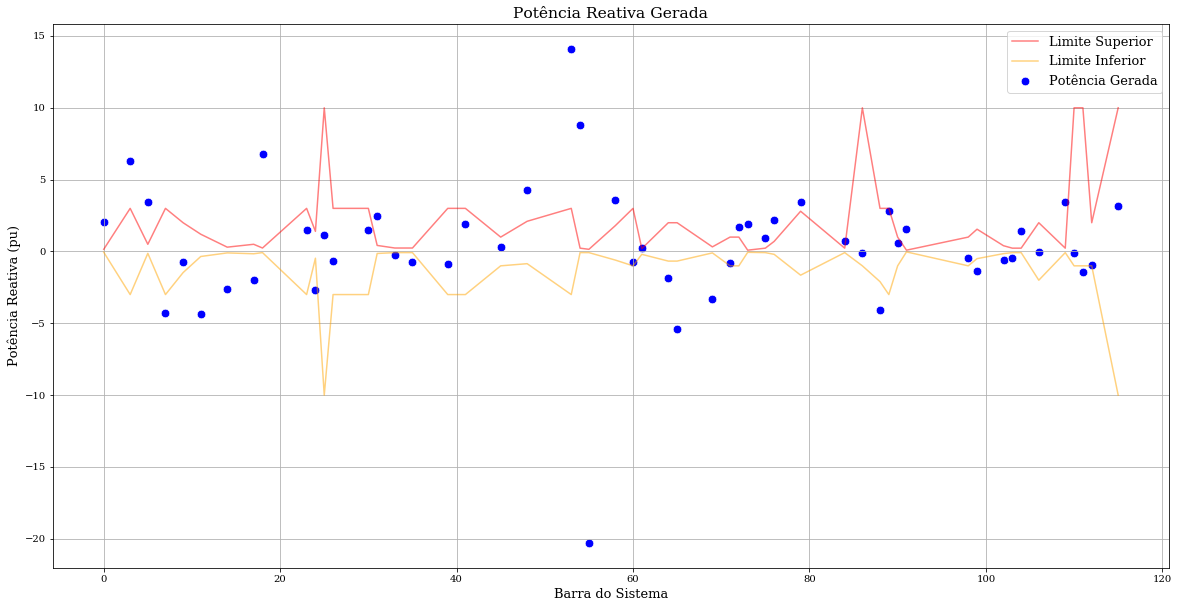

In [308]:
coleta_dados_gen(sep118,relatorio=True)


## 2.5 Função Objetivo Para Calcular as Perdas de Potência Ativa nas Linhas de Transmissão

In [321]:
def func_objetivo(vbarra,theta,condutancias,relatorio=True):
    
       
    '''
    
    Calcula as perdas nas linhas de transmissão de acordo com as tensões, ângulos das barras e condutâncias de linha.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    vbarra : tensão da barra.
    theta : ângulo da barra.
    condutancias : matriz de condutâncias de linha (triângulo superior)
    
    caso relatorio = True, retorna relatório informando a matriz de perdas de linha e as perdas totais.
                caso relatorio = False, retorna apenas as perda em pu.
    
    Retorno
    ----------
    
    perdas : perdas de potência ativa em pu.
    
    
    Observações:
    - - - - - - -
    
    Potência Aparente de Base : 100 MVA
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    
    matriz_v = np.zeros((len(vbarra),len(vbarra)), dtype=np.float64)
    
    matriz_theta = np.zeros((len(theta),len(theta)), dtype=np.float64)
    
    for barra in range(len(vbarra)):
        
        matriz_v[:,barra]=vbarra
        matriz_theta[:,barra]=theta
        
    
    soma_v = np.power(matriz_v,2) + np.power(matriz_v.T,2)
    
    subtrai_theta = matriz_theta - matriz_theta.T
    
    cosenotheta=np.cos(np.radians(subtrai_theta))
    
    produto = 2 * np.multiply(np.multiply(matriz_v, matriz_v.T),cosenotheta)
    
    matriz_perdas = np.multiply(condutancias,soma_v-produto) 
    
    perdas = np.sum(matriz_perdas,dtype=np.float64)
    
    if relatorio == True:
        
        tabela = np.zeros((1,2))
        tabela[:,0] = perdas
        tabela[:,1] = perdas*100
        table = tabulate.tabulate(tabela, headers = ['Perdas Totais Nas Linhas (pu)','Perdas Totais Nas Linhas (MW)'], tablefmt="psql")
        print(table)
        
        if len(vbarra) ==14:
            plt.figure(figsize=(18,10))
            sns.heatmap(100*(matriz_perdas+matriz_perdas.T),annot=True,cmap="jet")
            plt.xlabel('Barra Origem')
            plt.ylabel('Barra Destino')
            plt.title('Matriz de Perdas de Linha Completa [MW]')

     
    else:
    
        return perdas


### Teste

+---------------------------------+---------------------------------+
|   Perdas Totais Nas Linhas (pu) |   Perdas Totais Nas Linhas (MW) |
|---------------------------------+---------------------------------|
|                        0.146496 |                         14.6496 |
+---------------------------------+---------------------------------+


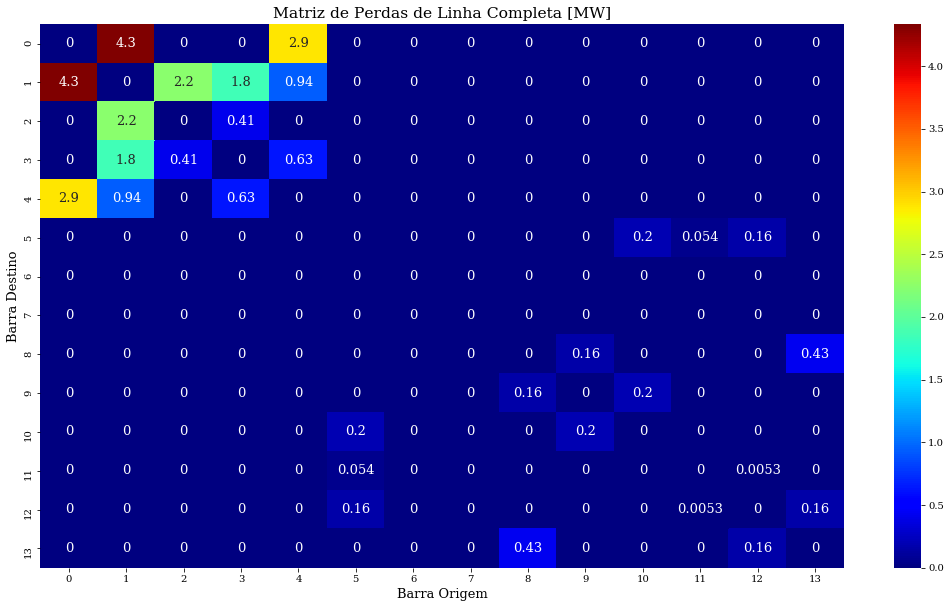

In [322]:
tensao,angulo, vlims ,vlimi = coleta_dados_vbus(sep14,relatorio=False)
matrizg = matriz_condutancia(sep14,relatorio=False)

func_objetivo(tensao,angulo,matrizg,relatorio=True)


## 2.6 Função Para Calcular a Penalização por Ultrapassagem de Tensão

In [313]:
def pen_tensao(vbus, limite_sup, limite_inf,relatorio=True):
    
    """    
    Calcula a parcela de penalização pura (sem constante de multiplicação) referente a violação dos limites de tensão.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    vbus : tensões das barras do sistema elétrico.
    limite_sup : limite superior das tensões das barras do sistema elétrico.
    limite_inf : limite inferior das tensões das barras do sistema elétrico.
    
    limite_sup : tensões
    relatorio : caso relatorio = True, retorna penalização e nº de violações 
                caso relatorio = False, retorna apenas o valor de penalização.
    Retorno
    -------    
    penalização: somatório da diferença ao quadradado das tensões que ultrapassaram os limites inferiores ou superiores.
    
    Observações:
    ------------
    
    ...
    
    """
    
    
    inferior = vbus - limite_inf
    superior = limite_sup - vbus
    penalizacao = np.sum(np.power(superior[superior<0],2))+np.sum(np.power(inferior[inferior<0],2))
    
    if relatorio == True:
        
        print('Penalização de Tensão:\n')
        print(penalizacao,'\n')
        print('Número de Violações:\n')
        print(len(inferior[inferior<0])+len(superior[superior<0]))
     
    else:
    
        return penalizacao


### Teste

In [314]:
pen_tensao(tensao,vlims,vlimi,relatorio=True)

Penalização de Tensão:

0.0023502551211096096 

Número de Violações:

3


## 2.7 Função Para Calcular a Penalização por Ultrapassagem de Geração de Reativo

In [59]:
def pen_ger_reativo(q, limite_sup, limite_inf,relatorio=True):
    
    """    
    Calcula a parcela de penalização pura (sem constante de multiplicação) referente a violação dos limites de geração de reativos.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    q : potências reativas das barras de controle de reativo do sistema elétrico.
    limite_sup : limite superior das potências reativas das barras de controle de reativo do sistema elétrico.
    limite_inf : limite superior das potências reativas das barras de controle de reativo do sistema elétrico.
    
    limite_sup : tensões
    relatorio : caso relatorio = True, retorna penalização e nº de violações 
                caso relatorio = False, retorna apenas o valor de penalização.
    Retorno
    -------    
    penalização: somatório da diferença ao quadradado das potências reativas que ultrapassaram os limites inferiores ou superiores.
    
    Observações:
    ------------
    
    ...
    
    """
    inferior = q - limite_inf
    superior = limite_sup - q
    penalizacao = np.sum(np.power(superior[superior<0],2))+np.sum(np.power(inferior[inferior<0],2))
    
    if relatorio == True:
        
        print('Penalização de Geração de Reativos:\n')
        print(penalizacao,'\n')
        print('Número de Violações:\n')
        print(len(inferior[inferior<0])+len(superior[superior<0]))
        
    else:
    
        return penalizacao


### Teste

In [60]:
vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep14,relatorio=False)

In [61]:
pen_ger_reativo(qgen, q_lim_superior, q_lim_inferior,relatorio=True)

Penalização de Geração de Reativos:

0.0 

Número de Violações:

0


In [62]:
print('Resultado Esperado:\n')
print(0.0)

Resultado Esperado:

0.0


## 2.8 Função Para Coletar Dados de Carregamento e TAP dos Trafos

In [352]:
def coleta_dados_trafo(sep, relatorio=True):
    
    '''    
    
    
    Valores dos TAPs Retirados de:
    
    - REFORMULAÇÃO DAS RESTRIÇÕESDE COMPLEMENTARIDADE EM PROBLEMAS DE FLUXO DE POTÊNCIA ÓTIMO
      Marina Valença Alencar - Dissertação de Mestrado

    - FUNÇÕES PENALIDADE PARA O TRATAMENTO DAS VARIÁVEIS DISCRETAS DO PROBLEMA DE FLUXO DE POTÊNCIA ÓTIMO REATIVO
      Daisy Paes Silva - Dissertação de Mestrado
    

    ''' 
    
    sep.trafo.sort_index()
   
    sep.res_trafo.sort_index()
    
    sep.trafo['tap_pos']=np.abs(sep.trafo['tap_pos'])
    
    n_trafos_controlados = sep.trafo['tap_pos'].count()
    
    carregamento = sep.res_trafo['loading_percent'].to_numpy()
    
    tap_pos = sep.trafo[~pd.isnull(sep.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)
    
    tap_neutral = sep.trafo[~pd.isnull(sep.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)
    
    tap_step_percent = sep.trafo[~pd.isnull(sep.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)
        
    
    if len(sep.bus)==14:
        
        step = 0.01
        valores_taps = np.arange(start = 0.95, stop = 1.1, step = step)
        
        
    if len(sep.bus)==30:
        
        step = 0.01
        valores_taps = np.arange(start = 0.95, stop = 1.05, step = step)
        
                
    if len(sep.bus)==118:
        
        step = 0.01
        valores_taps = np.arange(start = 0.9, stop = 1.05, step = step)

                    
    if len(sep.bus)==300:
        
        step = 0.01
        valores_taps = np.arange(start = 0.9, stop = 1.05, step = step)
        
        
    if relatorio == True:
        
    
        tap_pos = sep.trafo[~pd.isnull(sep.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)

        tap_neutral = sep.trafo[~pd.isnull(sep.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)

        tap_step_percent = sep.trafo[~pd.isnull(sep.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)
        
        valor_percentual= (tap_pos-tap_neutral)*(tap_step_percent/100) + 1
        
        plt.figure(figsize=(20,10))
        sns.scatterplot(x=np.arange(0,len(sep.trafo),1),y=carregamento,label='Carregamento',color='b',s=75)
        sns.lineplot(x=np.arange(0,len(sep.trafo),1),y=np.ones((len(sep.trafo))),label='Limite Máximo de Carregamento',color='r')
        plt.grid()
        
        plt.xlabel('Nº do Trafo')
        plt.ylabel('Carregamento %')
        plt.title('Carregamento dos Transformadores')
        
        plt.figure(figsize=(20,10))
        sns.scatterplot(x=np.arange(0,len(tap_pos)),y=valor_percentual,label='Valor do TAP',color='b',s=75)
        sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([1.5], (len(tap_pos))),label='Limite Máximo do TAP',color='r')
        sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([0.95], (len(tap_pos))),label='Limite Mínimo do TAP',color='orange')
        plt.grid()



        
        
        print('Carregamento do Trafo (pu):\n')
        print(carregamento,'\n')
        print('Número de Trafos com TAP Controlado:\n')
        print(n_trafos_controlados,'\n')
        print('Valores dos TAPs:\n')
        print(valor_percentual,'\n')
        
        
    else:
        
        return tap_pos, tap_neutral, tap_step_percent,valores_taps
    

### Teste

Carregamento do Trafo (pu):

[0.32896729 0.16454675 0.44374128 0.07400966 0.29592504] 

Número de Trafos com TAP Controlado:

3 

Valores dos TAPs:

[1.05 1.   1.03] 



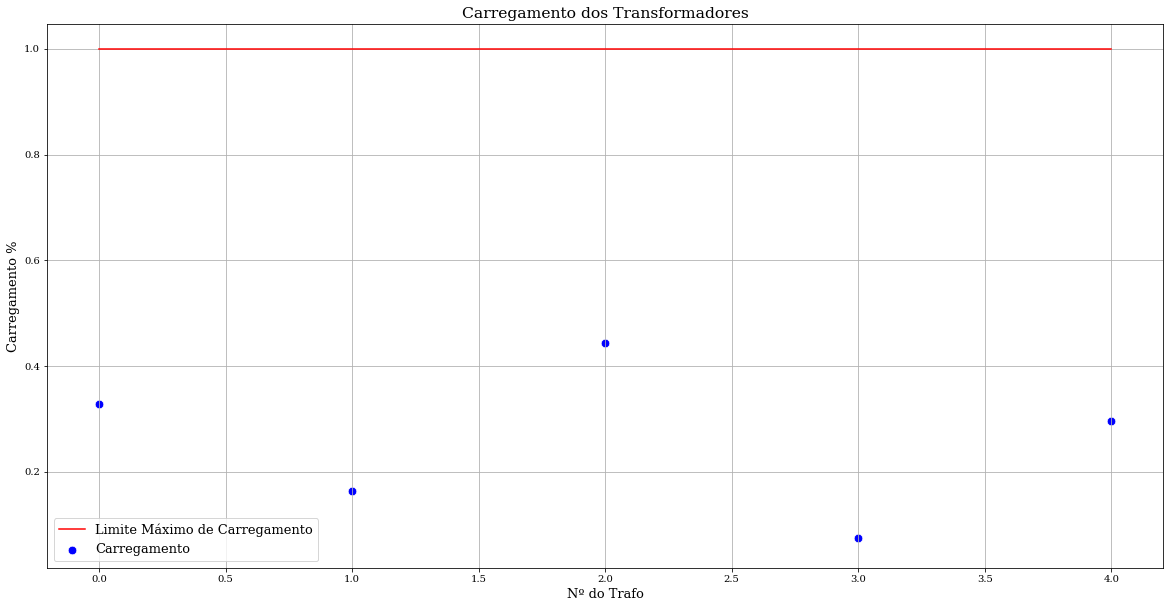

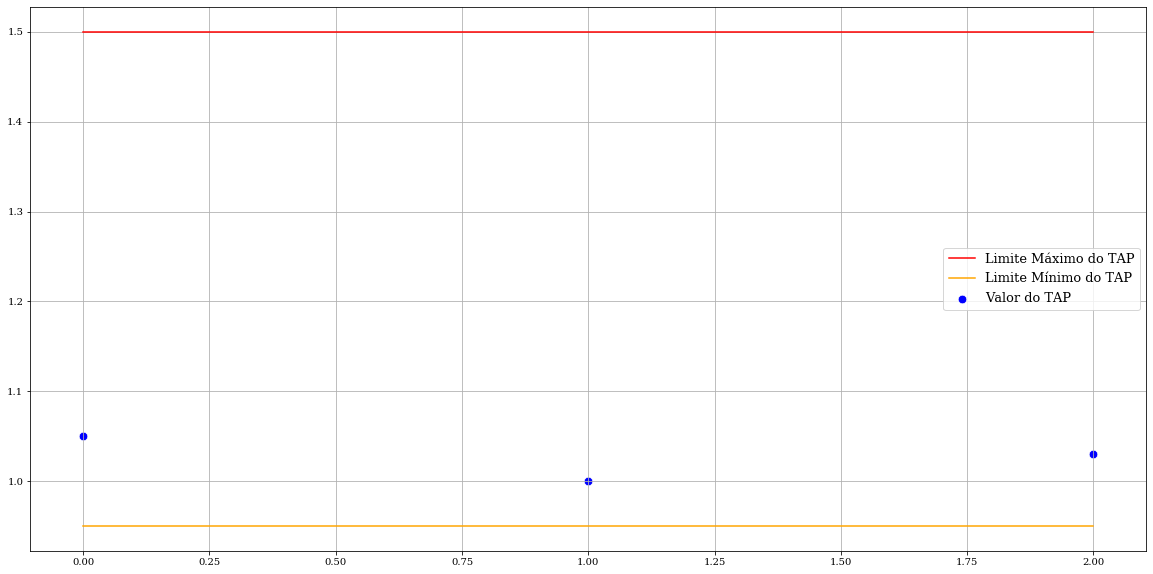

In [353]:
coleta_dados_trafo(sep14,relatorio=True)


In [354]:
def pen_trafo(linha,n_tap,n_vgen):
    
    step = 0.01

    linha[-3] = np.sum(np.square(np.sin((linha[n_vgen:n_vgen+n_tap]*np.pi/step))))
    
    return linha

### Teste

In [66]:
pen_trafo(np.array([0,0,0,0,0.95,0.97,1.003,0,0,0,0,0,0,0]), n_tap=3, n_vgen=4)

array([0.       , 0.       , 0.       , 0.       , 0.95     , 0.97     ,
       1.003    , 0.       , 0.       , 0.       , 0.       , 0.6545085,
       0.       , 0.       ])

## 2.9 Função Para Coletar Dados dos Reativos Shunt

In [67]:
def coleta_dados_bshunt(sep):
    
    '''    
    
    
    Valores dos Shunt Retirados de:
    
    - REFORMULAÇÃO DAS RESTRIÇÕESDE COMPLEMENTARIDADE EM PROBLEMAS DE FLUXO DE POTÊNCIA ÓTIMO
      Marina Valença Alencar - Dissertação de Mestrado

    - FUNÇÕES PENALIDADE PARA O TRATAMENTO DAS VARIÁVEIS DISCRETAS DO PROBLEMA DE FLUXO DE POTÊNCIA ÓTIMO REATIVO
      Daisy Paes Silva - Dissertação de Mestrado
    

    ''' 
    
    
    bus = sep.shunt['bus'].sort_values().to_numpy()
  
    
    if len(sep.bus)==14:
        
        bsh = np.array([[0,0.05,0.15,0.19,0.20,0.24,0.34,0.39]])
        
        
    if len(sep.bus)==30:
        
        bsh = np.array([[0,0.05,0.15,0.19,0.20,0.24,0.34,0.39],[0, 0.04, 0.05, 0.09]])
        
                
    if len(sep.bus)==118:
        
        bsh = np.array([[-0.40, -0.20, 0],[0, 0.06, 0.07, 0.13, 0.14, 0.20],[-0.25, -0.20, 0],[0, 0.10],[0, 0.10],[0, 0.10],[0, 0.15],[0.08, 0.12, 0.20],[0.10, 0.20],[0.10, 0.20],[0.10, 0.20],[0.10, 0.20],[0, 0.06, 0.07, 0.13, 0.14, 0.20],[0, 0.06, 0.07, 0.13, 0.14, 0.20]])
                            
    if len(sep.bus)==300:
        
    # PRECISA ENCONTRAR OS DADOS
        return 0
    
    return bsh, bus


In [68]:
bsh,bus=coleta_dados_bshunt(sep14)

In [69]:
bsh

array([[0.  , 0.05, 0.15, 0.19, 0.2 , 0.24, 0.34, 0.39]])

## 2.10 Função Para Converter TAPS

In [323]:
def converte_trafo(tap_pos, tap_neutral, tap_step_percent,valores_taps):
    
    '''
    Converte TAPS conforme equação disponibilizada pelo pandapower.
    
    https://pandapower.readthedocs.io/en/v2.1.0/elements/trafo.html
    
    '''
    
    taps_convertido = tap_neutral + ((valores_taps - 1.0)*(100/tap_step_percent))
    
    
    return taps_convertido

### Teste

In [71]:
tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep14,relatorio=False)

converte_trafo(np.array([0.98,0.95,1.1]), tap_neutral, tap_step_percent,valores_taps[0])

array([-2.27272727, -1.61290323, -0.73529412])

## 2.11 Função Para Criar Alcateia

In [356]:
def cria_alcateia(sep,n_lobos):
    
    """"
    
    Cria a alcatéia de lobos cinzentos.
    
    linhas = partículas
    
    colunas = tensões geradores, tap transformadores, susceptâncias shunt, perdas, penalização de tensão, penalização de reativo, penalização de trafo, penalização shunt, fitness
   
    
    """
    
    
    vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
    
    n_vgen=len(vgen)
    
    vbus, theta, v_lim_superior, v_lim_inferior = coleta_dados_vbus(sep,relatorio=False)
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
    
    n_taps = len(tap_pos)
    
    bshunt , bus = coleta_dados_bshunt(sep)
    
    n_bshunt = len(bus)
    
    dimensao = n_taps + n_vgen + n_bshunt + 6
    
    alcateia=np.zeros((n_lobos,dimensao),dtype=np.float64)
    
    alcateia[:,0:n_vgen] = np.random.uniform(np.max(v_lim_inferior), np.max(v_lim_superior), size=(n_lobos,n_vgen))
    
    alcateia[:,n_vgen:n_vgen+n_taps]=np.random.choice(valores_taps, size =(n_lobos, n_taps))
    
    i=1
    
    i=1
    
    for bsh in bshunt:
        
        alcateia[:,n_vgen+n_taps+i-1:n_vgen+n_taps+i] = np.random.choice(bsh, size =(n_lobos, 1))
        i=i+1

    return alcateia
    
    
    

### Teste

In [73]:
cria_alcateia(sep14,10)


array([[1.01838667, 0.98945567, 1.03936038, 0.96728009, 1.05      ,
        1.09      , 1.02      , 0.05      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.04344652, 1.0207621 , 1.03605105, 1.01805706, 0.95      ,
        1.03      , 1.02      , 0.24      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.02612667, 0.96572018, 0.96922709, 0.9862234 , 1.03      ,
        1.07      , 1.04      , 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.00171274, 1.00604346, 0.99227526, 0.98750729, 1.        ,
        0.98      , 0.97      , 0.24      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.95201051, 0.98557371, 0.96558106, 1.02154382, 0.95      ,
        1.1       , 1.        , 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.98453414, 0.96361238, 1.0

## 2.12 Função Para Criar o Enxame de Partículas

In [74]:
def cria_enxame(sep,n_particulas):
    
    """"
    
    Cria o enxame de partículas.
    
    
    linhas = partículas
    
    colunas = tensões geradores, tap transformadores, susceptâncias shunt, perdas, penalização de tensão, penalização de reativo, penalização de trafo, penalização shunt, fitness
    
    """
    
    
    vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
    
    n_vgen=len(vgen)
    
    vbus, theta, v_lim_superior, v_lim_inferior = coleta_dados_vbus(sep,relatorio=False)
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
    
    n_taps = len(tap_pos)
    
    bshunt , bus = coleta_dados_bshunt(sep)
    
    bshunt = np.array(bshunt)
    
    n_bshunt = len(bus)
    
    dimensao = n_taps + n_vgen + n_bshunt + 6
    
    enxame=np.zeros((n_particulas,dimensao),dtype=np.float64)
    
    enxame[:,0:n_vgen] = np.random.uniform(np.max(v_lim_inferior), np.max(v_lim_superior), size=(n_particulas,n_vgen))
    
    enxame[:,n_vgen:n_vgen+n_taps]=np.random.choice(valores_taps, size =(n_particulas, n_taps))
    
    i=1
    
    for bsh in bshunt:
        
        enxame[:,n_vgen+n_taps+i-1:n_vgen+n_taps+i] = np.random.choice(bsh, size =(n_particulas, 1))
        i=i+1
        
    return enxame

### Teste

In [75]:
cria_enxame(sep14,5)

array([[1.01509302, 1.04946126, 1.00040631, 0.98955512, 1.05      ,
        1.09      , 1.        , 0.24      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.00454028, 0.96907743, 1.04987618, 0.99152399, 1.07      ,
        0.97      , 1.        , 0.05      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.98886107, 0.98648852, 1.00996554, 1.0428411 , 1.02      ,
        0.98      , 0.96      , 0.05      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.98842677, 1.0376951 , 1.01260933, 1.03352099, 1.01      ,
        0.99      , 1.08      , 0.15      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.04969543, 1.01782364, 1.01835412, 0.97074359, 1.02      ,
        1.07      , 1.01      , 0.34      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

## 2.13 Função para Calcular o Fluxo de Potência

In [363]:
def fluxo_de_pot(grupo, sep):
    
    n_bshunt = len(sep.shunt)
    n_vgen = len(sep.gen)
    n_tap = np.abs(sep.trafo['tap_pos']).count()
    
    matrizg = matriz_condutancia(sep,relatorio=False)
    
    for linha in range(grupo.shape[0]):
        
        sep.gen['vm_pu']=grupo[linha,0:n_vgen]
        
        tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
        
        sep.trafo['tap_pos'][~pd.isnull(sep.trafo['tap_pos'])]=converte_trafo(tap_pos, tap_neutral, tap_step_percent,grupo[linha,n_vgen:n_vgen+n_tap])
        
        sep.shunt['q_mvar']=grupo[linha,n_vgen+n_tap:n_vgen+n_tap+n_bshunt]*-100
        
        pp.runpp(sep,algorithm='nr',numba=True, init = 'results', tolerance_mva = 1e-5)
        
        vbus, theta, v_lim_superior, v_lim_inferior=coleta_dados_vbus(sep,relatorio=False)
        
        grupo[linha,-6] = sep.res_line['pl_mw'].sum()/100 #func_objetivo(vbus,theta,matrizg,relatorio=False)

        grupo[linha,-5] = pen_tensao(vbus, v_lim_superior, v_lim_inferior,relatorio=False)
        
        vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
        
        grupo[linha,-4] = pen_ger_reativo(qgen, q_lim_superior, q_lim_inferior,relatorio=False)
        
        grupo[linha,:] = pen_trafo(grupo[linha,:],n_tap,n_vgen)
        
        
    
    return grupo
    

### Teste

In [364]:
enxame=cria_enxame(sep30,10)
enxame

array([[1.02443313, 1.04594235, 0.9514816 , 0.96896463, 1.01721513,
        0.97      , 0.98      , 1.        , 1.        , 0.2       ,
        0.09      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.04855448, 0.94928543, 1.01351564, 1.00693995, 0.97075648,
        1.02      , 1.01      , 1.03      , 0.97      , 0.05      ,
        0.09      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.99522276, 0.96813292, 0.9743552 , 1.0232232 , 1.02179913,
        1.        , 0.95      , 1.04      , 0.97      , 0.        ,
        0.05      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.97709231, 0.97889918, 0.96669056, 0.9572085 , 0.9721055 ,
        0.95      , 1.02      , 1.05      , 1.05      , 0.24      ,
        0.04      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.05940635, 1.0546103 , 1.02055982, 1.016756

In [284]:
fluxo_de_pot(enxame,sep30)

array([[1.00195280e+00, 9.69612264e-01, 9.82760368e-01, 1.03869785e+00,
        9.55118887e-01, 1.03000000e+00, 9.80000000e-01, 9.90000000e-01,
        1.02000000e+00, 5.00000000e-02, 4.00000000e-02, 1.92556061e-01,
        6.07822981e-03, 2.59764648e-01, 2.57933583e-27, 0.00000000e+00,
        0.00000000e+00],
       [9.66860713e-01, 1.02756181e+00, 9.60476755e-01, 9.70206503e-01,
        1.03240967e+00, 1.01000000e+00, 9.90000000e-01, 9.60000000e-01,
        1.03000000e+00, 2.00000000e-01, 9.00000000e-02, 2.44215376e-01,
        4.93460880e-03, 1.89846326e+00, 1.30116669e-27, 0.00000000e+00,
        0.00000000e+00],
       [9.71465517e-01, 9.74702563e-01, 9.69246568e-01, 9.93630343e-01,
        1.01395006e+00, 1.01000000e+00, 1.00000000e+00, 1.01000000e+00,
        1.01000000e+00, 2.40000000e-01, 9.00000000e-02, 2.17420934e-01,
        2.09756943e-03, 7.51242930e-01, 2.37035967e-28, 0.00000000e+00,
        0.00000000e+00],
       [1.05831979e+00, 1.05041795e+00, 9.61220444e-01, 1.058

## 2.14 Função para Calcular o Fitness (J)

In [285]:
def fitness (grupo,zeta,psi,sigma,omega):
    
# fitness J       perdas         pen tensão         pen q mvar          pen trafo           pen bshunt       
    grupo[:,-1]=(grupo[:,-6])+(zeta*grupo[:,-5])+(psi*grupo[:,-4])+(sigma*grupo[:,-3])+(omega*grupo[:,-2])

    return grupo

In [286]:
grupofit=fitness(grupo,100,100,0,0)

In [287]:
grupofit = grupofit[np.argsort(grupofit[:, -1])]


grupofit[0:2,:]

array([[1.00093963e+00, 9.65466622e-01, 9.52140013e-01, 9.62405772e-01,
        1.04457965e+00, 9.50000000e-01, 9.80000000e-01, 9.50000000e-01,
        1.05000000e+00, 3.90000000e-01, 9.00000000e-02, 1.95358851e-01,
        8.89732424e-03, 3.26842063e-02, 1.13603918e-27, 0.00000000e+00,
        4.35351190e+00],
       [1.04335044e+00, 9.98760451e-01, 9.67173254e-01, 9.80524495e-01,
        9.87867196e-01, 9.60000000e-01, 9.70000000e-01, 1.02000000e+00,
        9.60000000e-01, 1.50000000e-01, 4.00000000e-02, 1.90850052e-01,
        1.65755767e-04, 4.79014627e-01, 1.16839732e-27, 0.00000000e+00,
        4.81088883e+01]])

## 2.15 Função para Validação

In [329]:
def validacao (sep, best_solution):
    
    n_bshunt = len(sep.shunt)
    
    n_vgen = len(sep.gen)
    
    n_tap = np.abs(sep.trafo['tap_pos']).count()
    
    sep.gen['vm_pu']=best_solution[0:n_vgen]
        
    tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
        
    sep.trafo['tap_pos'][~pd.isnull(sep.trafo['tap_pos'])]=converte_trafo(tap_pos, tap_neutral, tap_step_percent,best_solution[n_vgen:n_vgen+n_tap])
        
    sep.shunt['q_mvar']=best_solution[n_vgen+n_tap:n_vgen+n_tap+n_bshunt]*-100
        
    pp.runpp(sep,algorithm='nr')
           
    print('Sistema Simulado Para a Solução:\n')
    print(best_solution)
    
    

## 3. Implementação de Métodos de Otimização Meta-Heurísticos

## 3.1 Método Alcateia de Lobos Cinzentos 

In [288]:
def otimizacao_alcateia_de_lobos_cinzentos(sep, zeta, psi, sigma, omega, max_iter, n_lobos,relatorio=True):
        
    alcateia_fit = cria_alcateia(sep,n_lobos)

    j = []
    
    perdas = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    
    alcateias = []
    
    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_lobos,1))
    lim_inf = np.tile(minimo, (n_lobos,1))
    
    
    for i in range(0,max_iter):

        start = time.time()
       
        alcateia_fit = fluxo_de_pot(alcateia_fit,sep)
        
        alcateia_fit = fitness(alcateia_fit,zeta,psi,sigma,omega)

        alcateia_fit = alcateia_fit[np.argsort(alcateia_fit[:, -1])]
        
        a = 2 - (i*(2/max_iter))
        
        r1 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        
        r2 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))

        A = (2*a*r1) - a
        
        C = 2*r2
        
        if (i == 0):
        
            lobo_alfa = alcateia_fit[0, :].copy()
            lobo_beta = alcateia_fit[1, :].copy()
            lobo_delta = alcateia_fit[2, :].copy()
            
            alfa = np.expand_dims(alcateia_fit[0,0:-6].copy(), 1)
            beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)
            delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)
            
        
        for t in range(3):

            if (alcateia_fit[t, -1] < lobo_alfa[-1]):

                lobo_alfa = alcateia_fit[0,:].copy()
                    
                alcateias.append(alcateia_fit)

                alfa = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] < lobo_beta[-1]):

                lobo_beta = alcateia_fit[1,:].copy()

                beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] > lobo_beta[-1] and alcateia_fit[t,-1] < lobo_delta[-1]):

                lobo_delta = alcateia_fit[2, :].copy()

                delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)         
        

        d_alfa = np.abs(np.multiply(C, alfa.T) - alcateia_fit[:, 0:-6])

        d_beta = np.abs(np.multiply(C, beta.T) - alcateia_fit[:, 0:-6])

        d_delta = np.abs(np.multiply(C, delta.T) - alcateia_fit[:, 0:-6])

        x_alfa = alfa.T - np.multiply(A, d_alfa)

        x_beta = beta.T - np.multiply(A, d_beta)

        x_delta = delta.T - np.multiply(A, d_delta)

        alcateia_fit[:,0:-6] = (x_alfa + x_beta + x_delta)/3

        alca_estat = alcateia_fit[:,-6:]

        alcateia_fit = np.concatenate(( np.clip(alcateia_fit[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = alcateia_fit[:,0:-6]),alca_estat),axis=1)
        
    
        end = time.time()

        elapsed = end - start
        
        j.append(lobo_alfa[-1])

        perdas.append(lobo_alfa[-6])

        pen_v.append(lobo_alfa[-5])

        pen_gq.append(lobo_alfa[-4])

        pen_tap.append(lobo_alfa[-3])

        pen_bsh.append(lobo_alfa[-2])       
        
        tempo = []
        
        tempo.append(elapsed)
        
        if relatorio == True:
            
            print(' ')

            print('Lobo Alfa da Iteração:',i)

            print('Perdas (pu):',lobo_alfa[-6])

            print('Penalização de Tensão:',lobo_alfa[-5])

            print('Penalização de Geração de Reativo:',lobo_alfa[-4])

            print('Penalização do Tap:',lobo_alfa[-3])

            print('Penalização do Bshunt:',lobo_alfa[-3])

            print('Fitness:',lobo_alfa[-1])
            
            print('Tempo: ',elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')

    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, tempo

    

## 3.2 Método Enxame de Partículas

In [289]:
def otimizacao_enxame_de_particulas(sep, zeta, psi, sigma, omega, max_iter, n_particles,c1,c2,w,valor_inicial,relatorio=True,inicial=True):
        
    enxame_fit = cria_enxame(sep,n_particles)
    
    if inicial == True:
        
        enxame_fit[0,:]=valor_inicial
        
    
    v_anterior = cria_enxame(sep,n_particles)
    
    w_anterior = w
    
    j = []
    
    perdas = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    

    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_particles,1))
    lim_inf = np.tile(minimo, (n_particles,1))

    
    for i in range(0,max_iter):
 
        r1 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
        
        r2 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
        
        start = time.time()
       
        enxame_fit = fluxo_de_pot(enxame_fit,sep)
        
        enxame_fit = fitness(enxame_fit,zeta,psi,sigma,omega)

        if i==0:
            
            best_particles = enxame_fit.copy()

            global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
            global_matriz = np.tile(global_best, (n_particles,1))
            
           
        for t in range(0,n_particles):
                
            if enxame_fit[t,-1] < best_particles[t,-1]:
                    
                best_particles[t,:] = enxame_fit[t,:].copy()
                    

        global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
        global_matriz = np.tile(global_best, (n_particles,1))   
            
            
        enxame_fit_anterior = enxame_fit.copy()
        
        w_novo = w_anterior*4*(1-w_anterior)
        
        v_novo = np.multiply(w_novo,v_anterior.copy()) + c1*np.multiply(r1,(best_particles.copy()-enxame_fit.copy())) + c2*np.multiply(r2,(global_matriz.copy()-enxame_fit.copy()))
        
        enxame_fit_novo = enxame_fit_anterior  + v_novo
        
        v_anterior = v_novo.copy()
        
        w_anterior = w_novo
        
        enxame_estat = enxame_fit_novo[:,-6:]

        enxame_fit = np.concatenate(( np.clip(enxame_fit_novo[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = enxame_fit_novo[:,0:-6]),enxame_estat),axis=1)   
    
        end = time.time()

        elapsed = end - start

        j.append(global_best[-1])

        perdas.append(global_best[-6])

        pen_v.append(global_best[-5])

        pen_gq.append(global_best[-4])

        pen_tap.append(global_best[-3])

        pen_bsh.append(global_best[-2])
        
        tempo = []
        
        tempo.append(elapsed)
      
    
        
        if relatorio == True:
            
            print(' ')

            print('Melhor Global da Iteração:',i)

            print('Perdas (pu):', global_best[-6])

            print('Penalização de Tensão:', global_best[-5])

            print('Penalização de Geração de Reativo:', global_best[-4])

            print('Penalização do Tap:', global_best[-3])

            print('Penalização do Bshunt:', global_best[-3])

            print('Fitness:', global_best[-1])
            
            print('Tempo: ', elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
    
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')
            
    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo

      

### Teste

 
Lobo Alfa da Iteração: 0
Perdas (pu): 0.13589928511880933
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.041052390465845814
Penalização do Tap: 3.6304029504427534e-28
Penalização do Bshunt: 3.6304029504427534e-28
Fitness: 0.13589928511913674
Tempo:  0.22807884216308594
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 1
Perdas (pu): 0.13589928511880933
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.041052390465845814
Penalização do Tap: 3.6304029504427534e-28
Penalização do Bshunt: 3.6304029504427534e-28
Fitness: 0.13589928511913674
Tempo:  0.19867777824401855
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 2
Perdas (pu): 0.13589928511880933
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.041052390465845814
Penalização do Tap: 3.6304029504427534e-28
Penalização do Bshunt: 3.630402950442

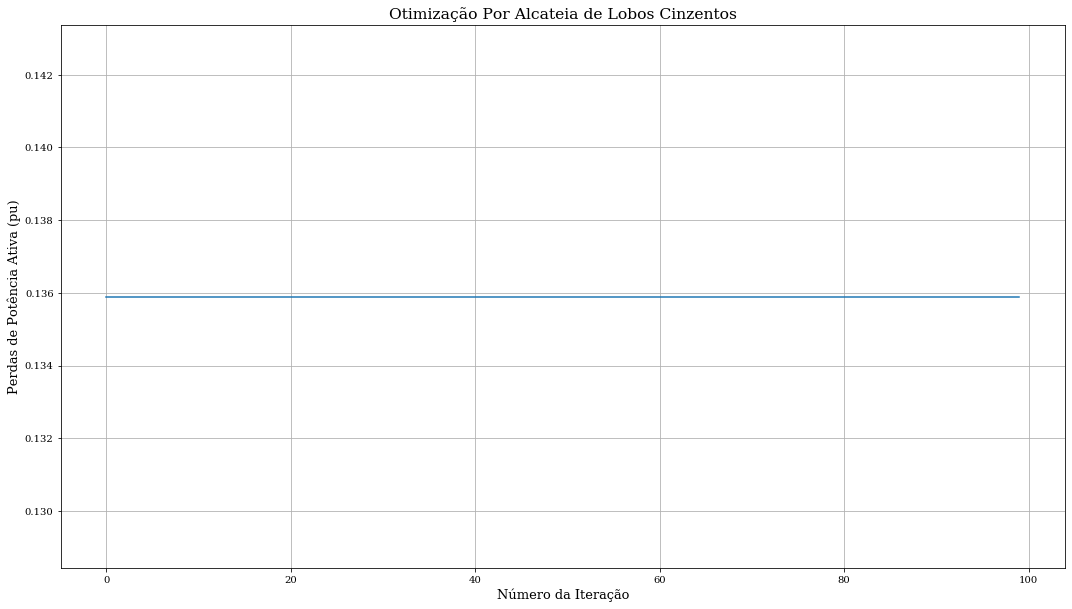

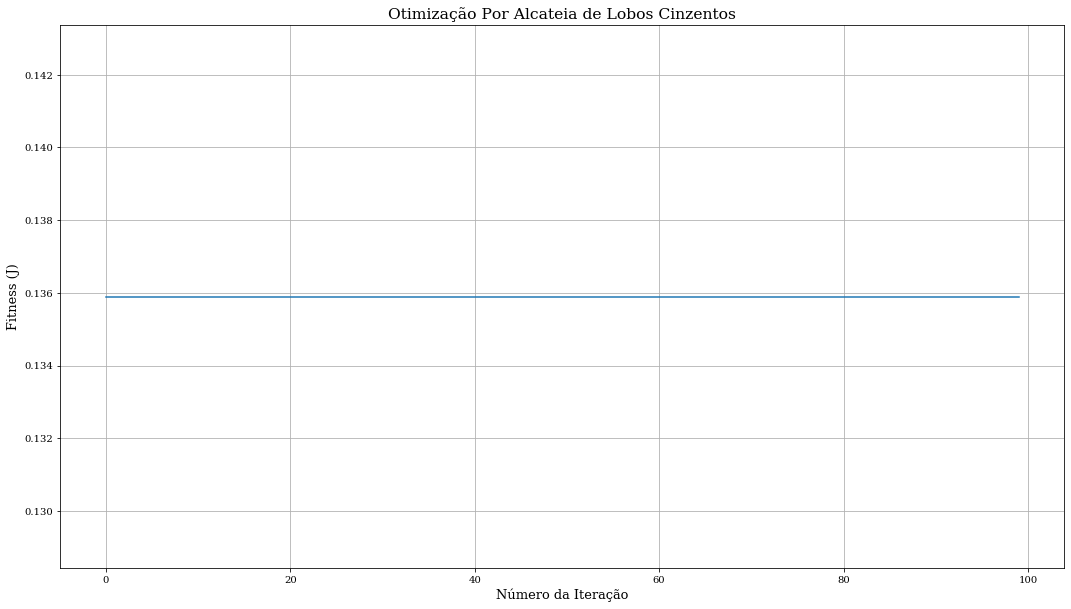

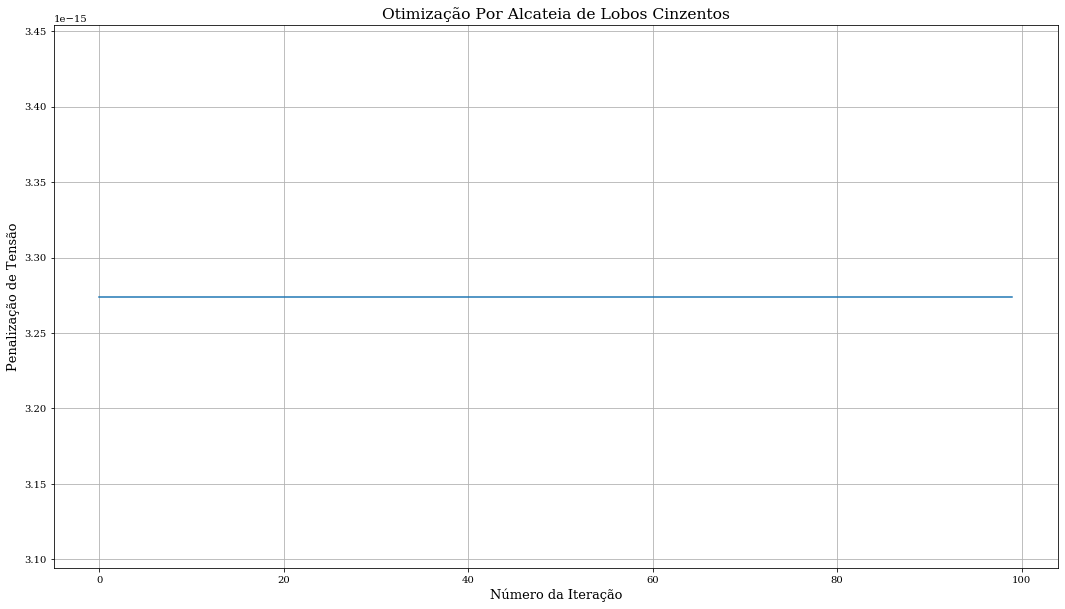

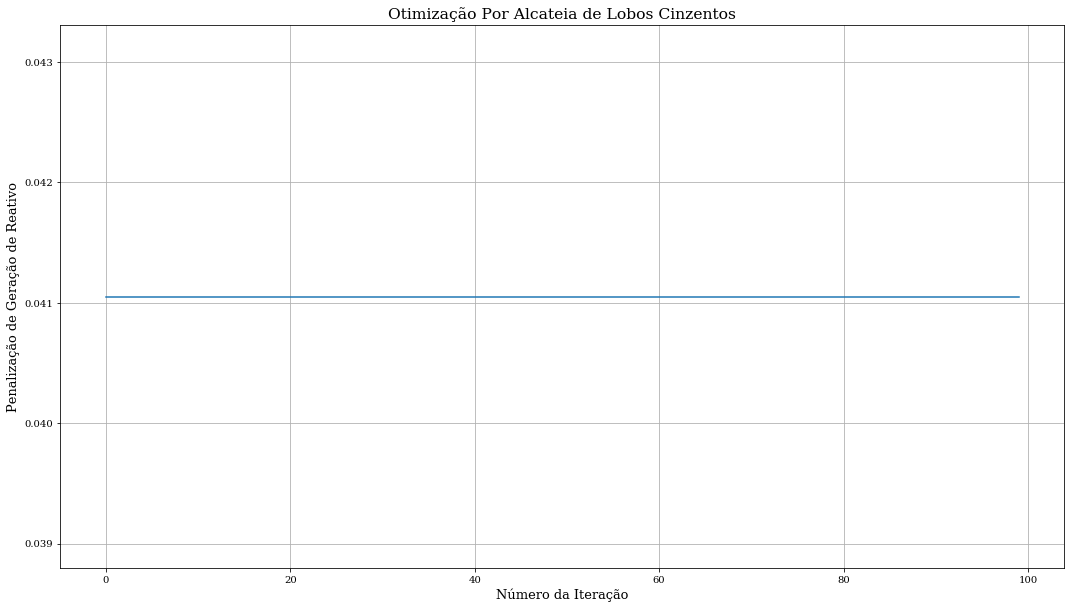

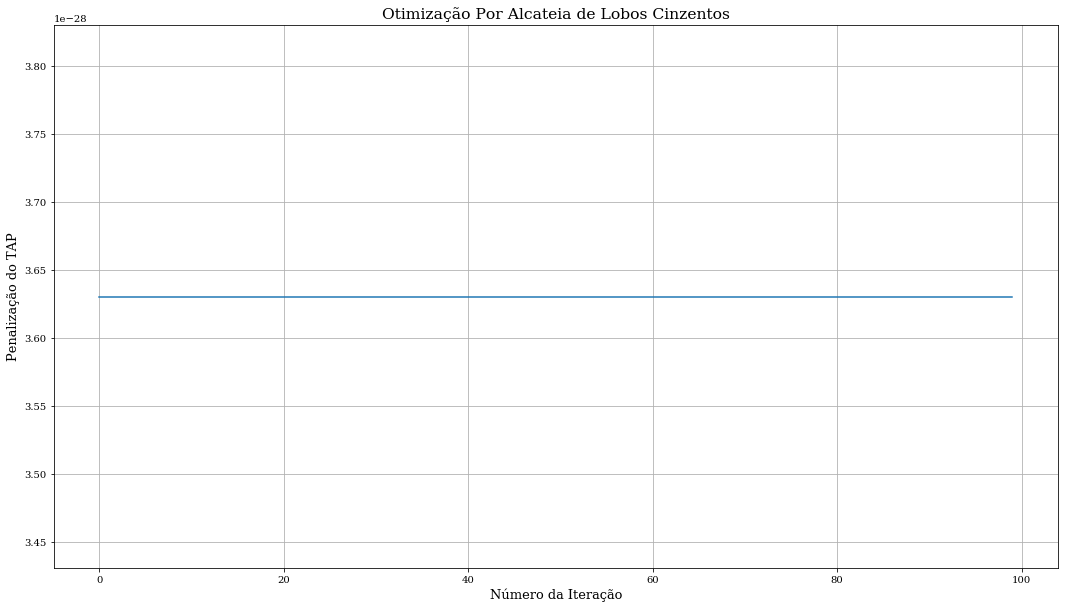

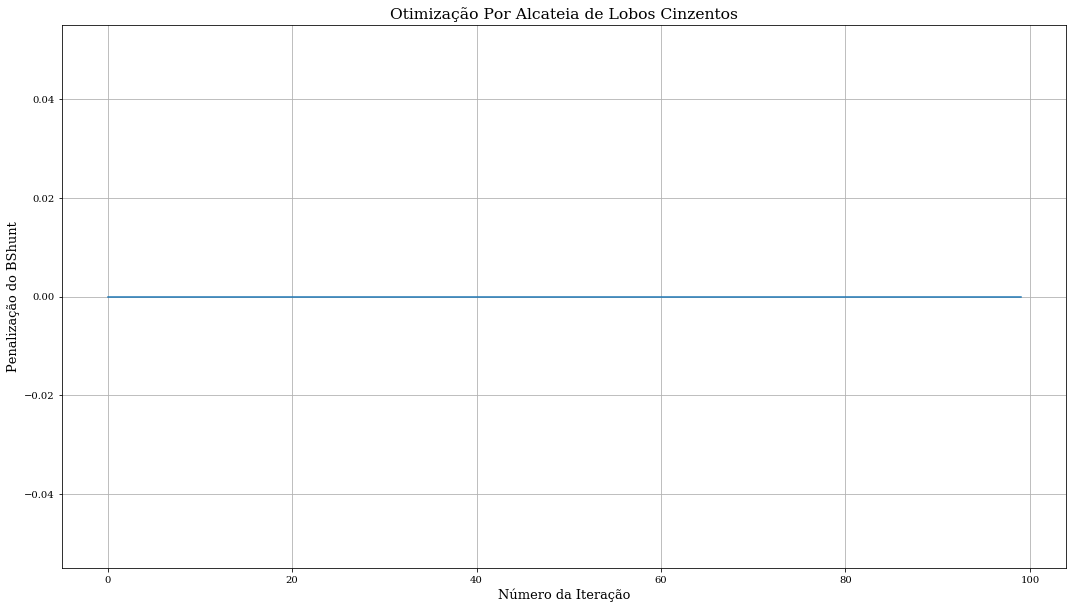

In [366]:

j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, elapsed = otimizacao_alcateia_de_lobos_cinzentos(sep14, 100, 0, 100, 0, 100, 12,relatorio=True)



 
Melhor Global da Iteração: 0
Perdas (pu): 0.13531362621258666
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.0080579129363638
Penalização do Tap: 9.582662252481989e-28
Penalização do Bshunt: 9.582662252481989e-28
Fitness: 0.1353136262130778
Tempo:  0.7293221950531006
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 1
Perdas (pu): 0.13531362621258666
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.0080579129363638
Penalização do Tap: 9.582662252481989e-28
Penalização do Bshunt: 9.582662252481989e-28
Fitness: 0.1353136262130778
Tempo:  0.724191427230835
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 2
Perdas (pu): 0.13531362621258666
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.0080579129363638
Penalização do Tap: 9.582662252481989e-28
Penalização do Bshunt: 9.582662252481989e

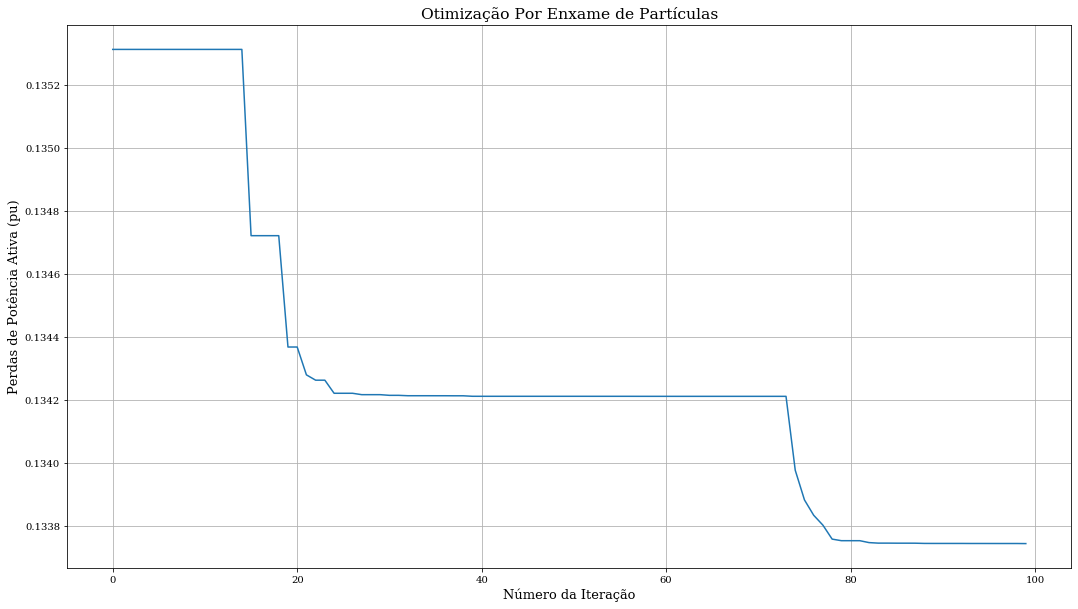

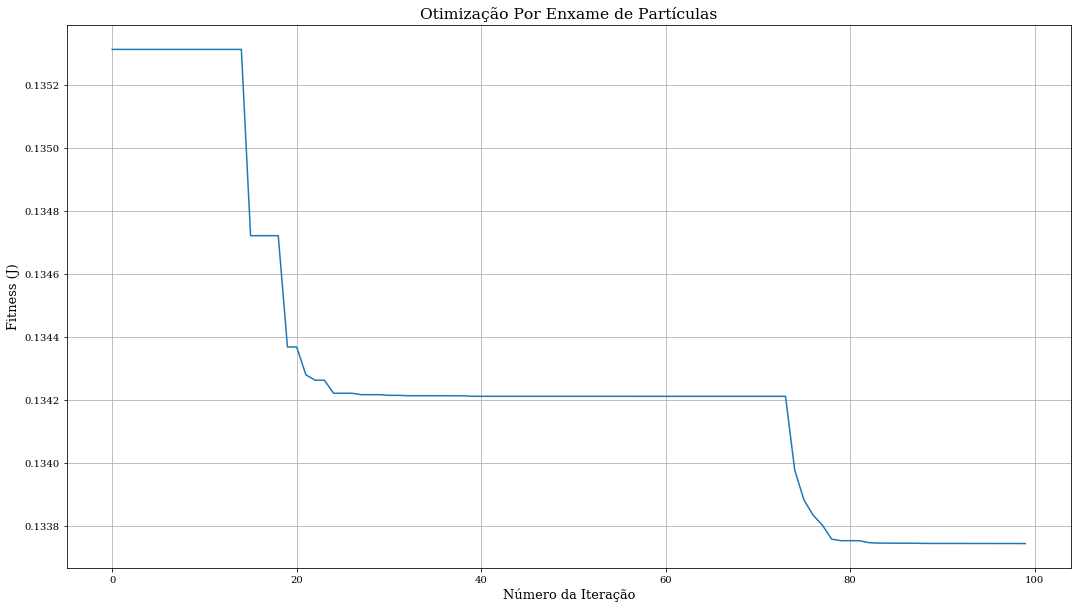

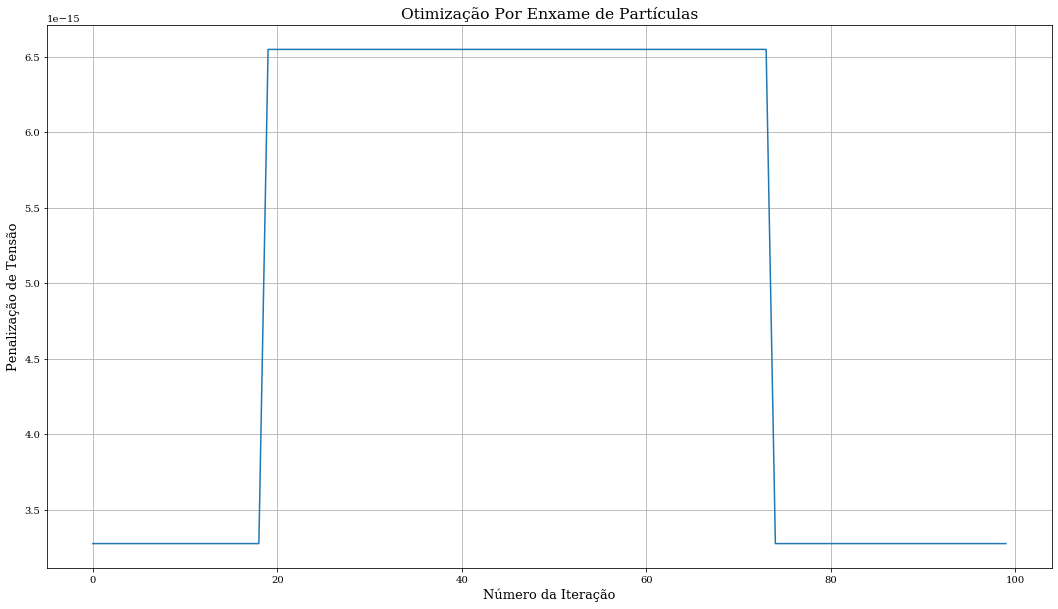

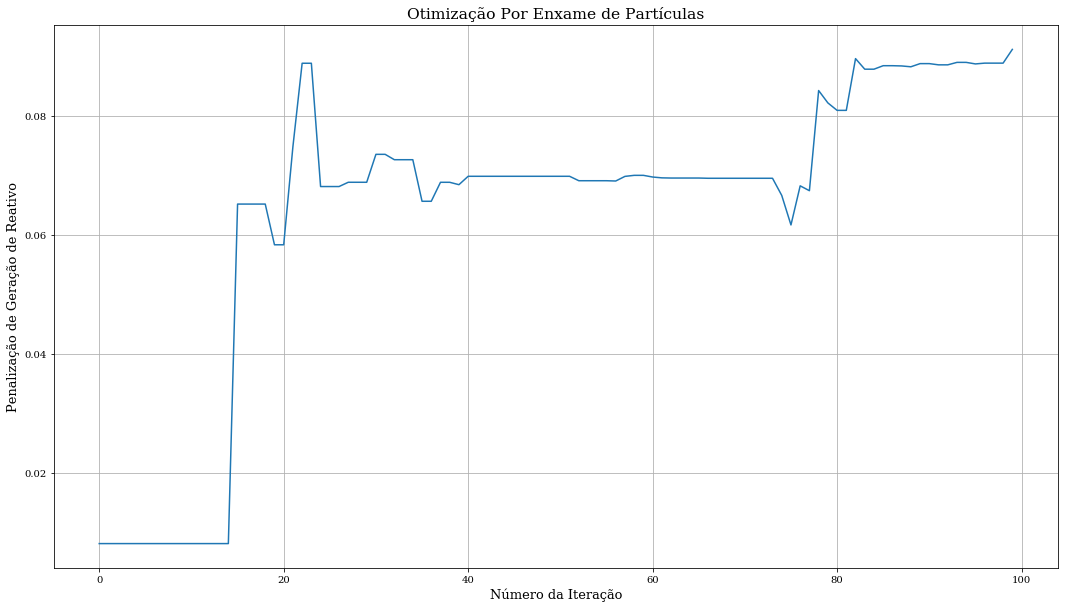

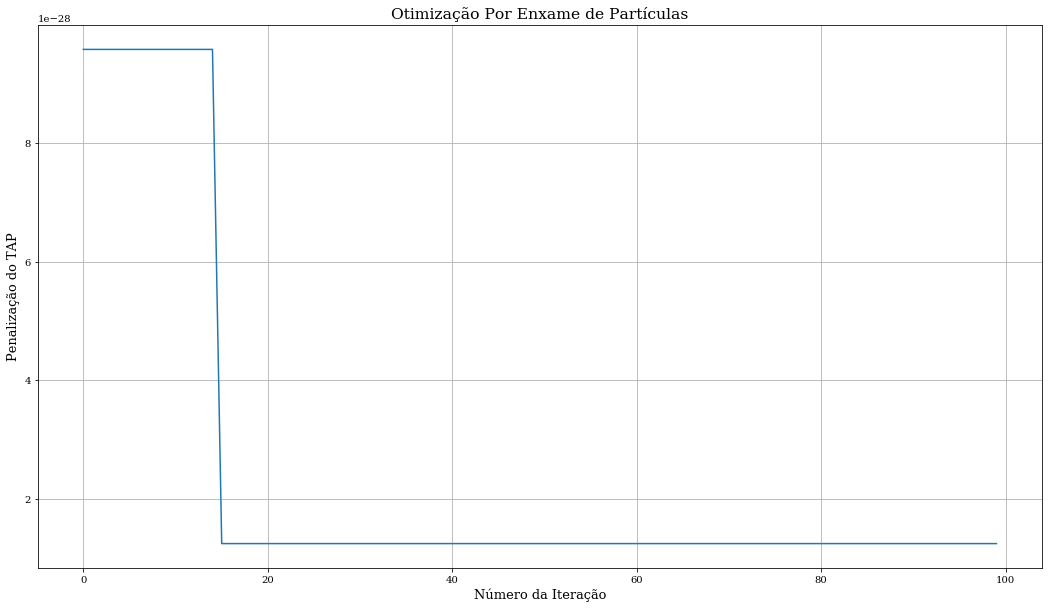

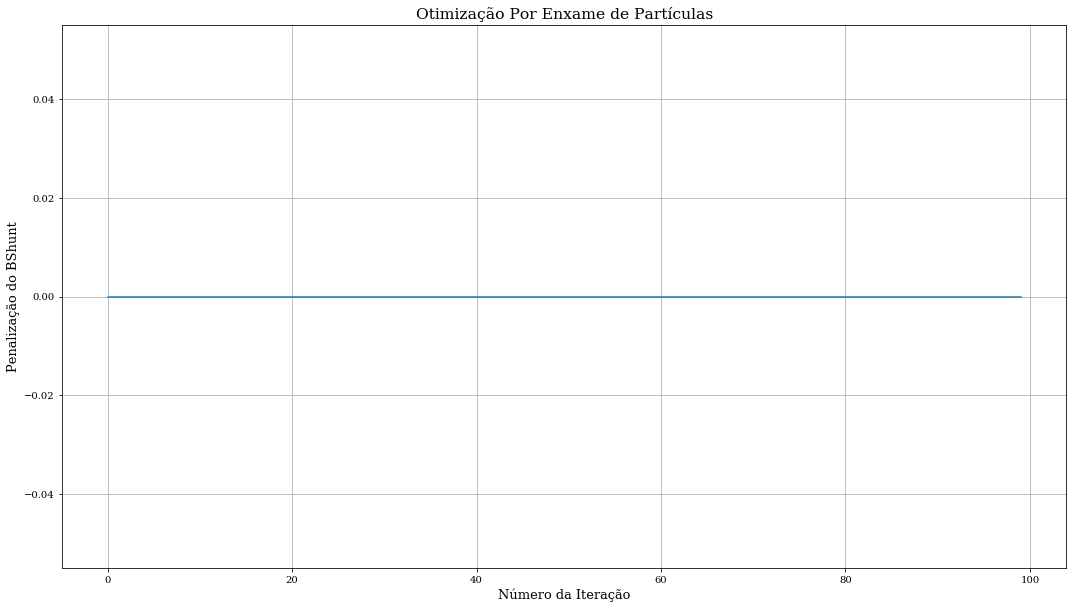

In [365]:
j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_enxame_de_particulas(sep14, 150, 0, 100, 0, 100, 50, 2, 2, 0.7,lobo_alfa,relatorio=True,inicial=False)
    

In [367]:
validacao(sep14,global_best)

Sistema Simulado Para a Solução:

[1.04738723e+00 1.01843380e+00 1.02680138e+00 1.05982791e+00
 9.50000000e-01 1.10000000e+00 1.10000000e+00 1.95178514e-01
 1.33744006e-01 3.27418093e-15 9.12418121e-02 1.24045882e-28
 0.00000000e+00 1.33744006e-01]


+---------------------------+--------------------------+----------------------+----------------------+
|   Tensões nas Barras (pu) |   Ângulos das Barras (°) |   Limites Inferiores |   Limites Superiores |
|---------------------------+--------------------------+----------------------+----------------------|
|                  1.06     |                  0       |                 0.94 |                 1.06 |
|                  1.04739  |                 -4.98598 |                 0.94 |                 1.06 |
|                  1.01843  |                -12.7068  |                 0.94 |                 1.06 |
|                  1.02837  |                -10.3764  |                 0.94 |                 1.06 |
|                  1.03937  |                 -8.96277 |                 0.94 |                 1.06 |
|                  1.0268   |                -15.099   |                 0.94 |                 1.06 |
|                  1.04699  |                -13.7125  |                 

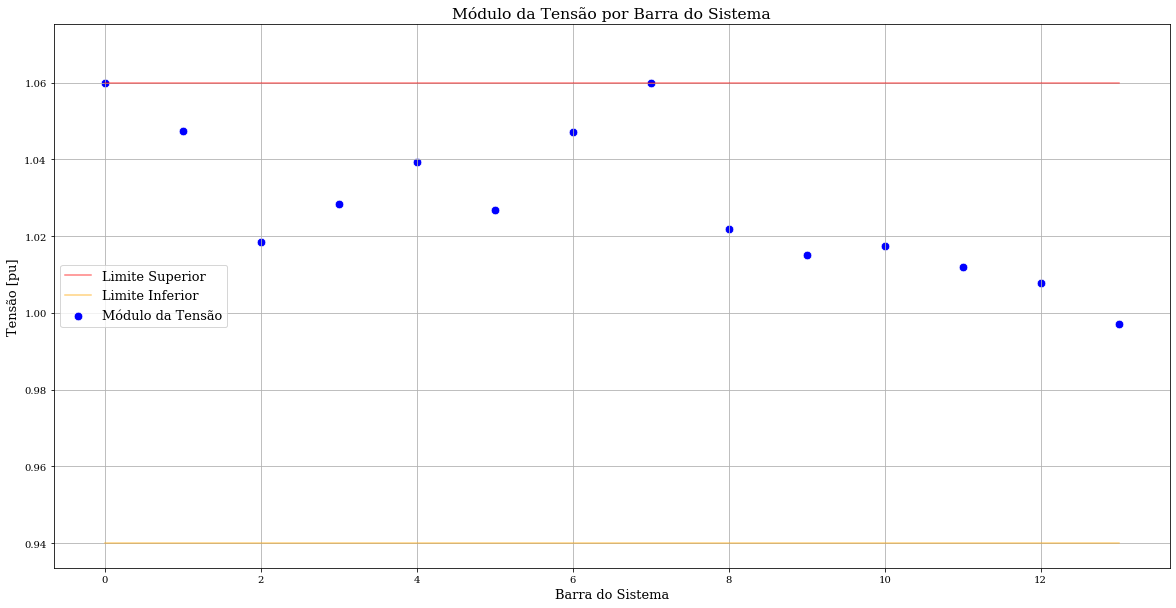

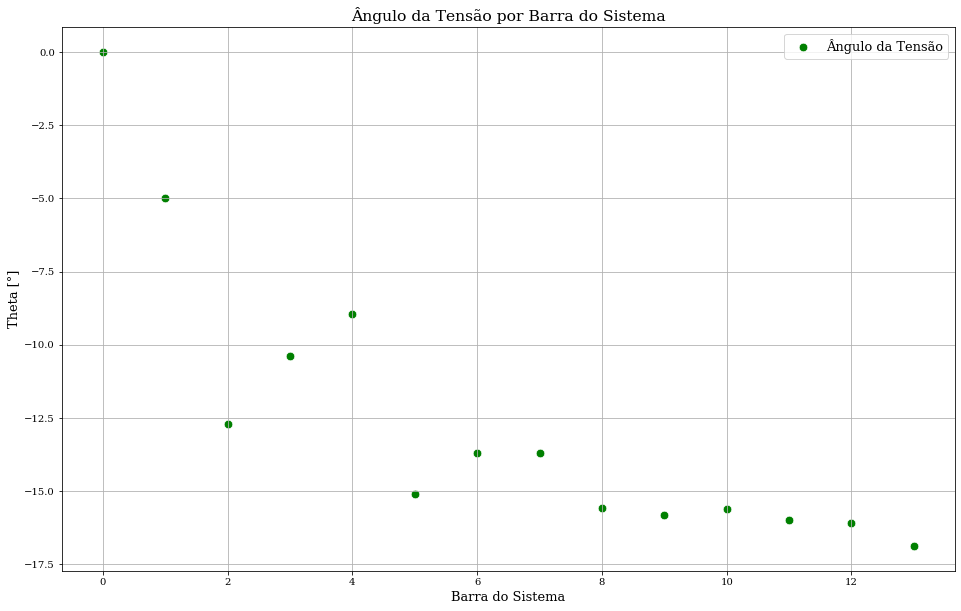

In [368]:
coleta_dados_vbus(sep14,relatorio=True)

+----------+--------------------+--------------------+-----------+--------------------+--------------------+
|   P (pu) |   P Lim. Sup. (pu) |   P Lim. Inf. (pu) |    Q (pu) |   Q Lim. Sup. (pu) |   Q Lim. Inf. (pu) |
|----------+--------------------+--------------------+-----------+--------------------+--------------------|
|      0.4 |                1.4 |                  0 | 0.294321  |               0.5  |              -0.4  |
|      0   |                1   |                  0 | 0.266216  |               0.4  |               0    |
|      0   |                1   |                  0 | 0.542063  |               0.24 |              -0.06 |
|      0   |                1   |                  0 | 0.0772316 |               0.24 |              -0.06 |
+----------+--------------------+--------------------+-----------+--------------------+--------------------+


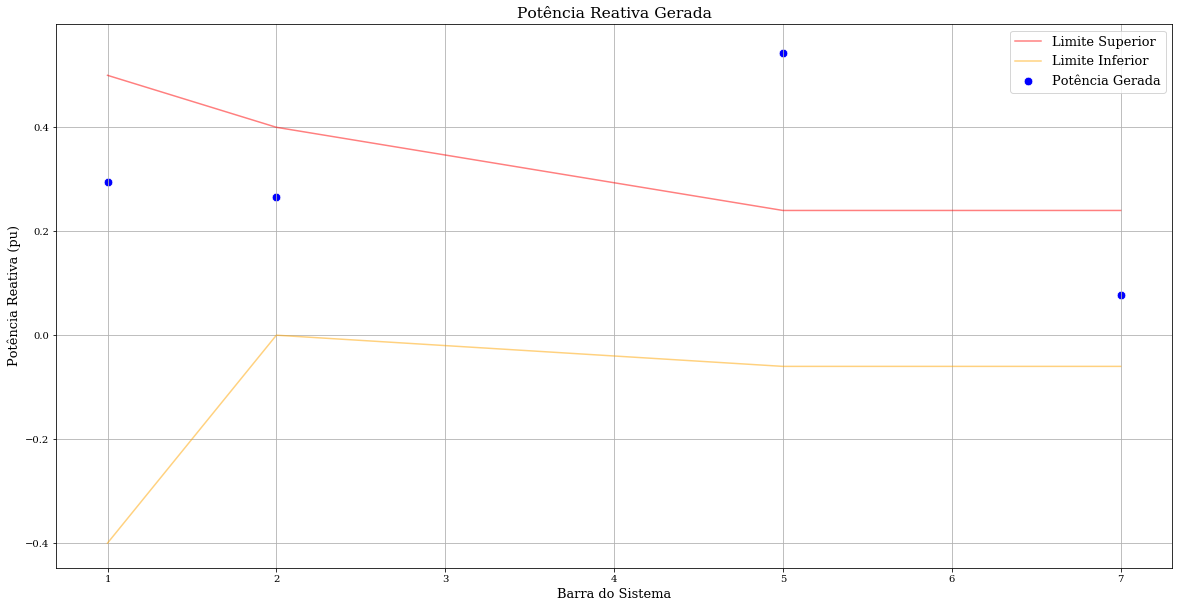

In [369]:
coleta_dados_gen(sep14,relatorio=True)

+---------------------------------+---------------------------------+
|   Perdas Totais Nas Linhas (pu) |   Perdas Totais Nas Linhas (MW) |
|---------------------------------+---------------------------------|
|                        0.133744 |                         13.3744 |
+---------------------------------+---------------------------------+


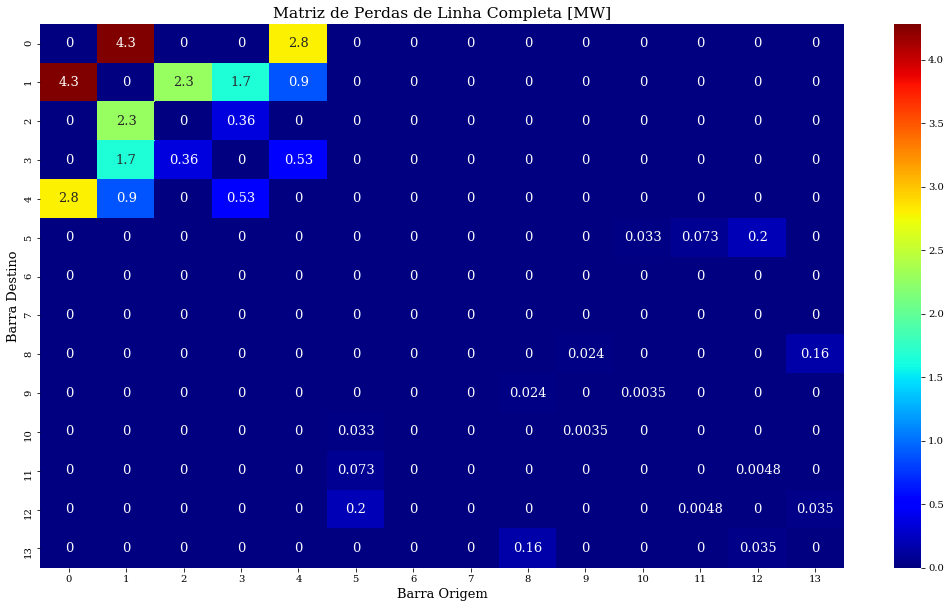

In [370]:
tensao,angulo, vlims ,vlimi = coleta_dados_vbus(sep14,relatorio=False)
matrizg = matriz_condutancia(sep14,relatorio=False)

func_objetivo(tensao,angulo,matrizg,relatorio=True)


Carregamento do Trafo (pu):

[0.36316005 0.22538769 0.5351628  0.07360791 0.38520836] 

Número de Trafos com TAP Controlado:

3 

Valores dos TAPs:

[1.05 1.1  1.1 ] 



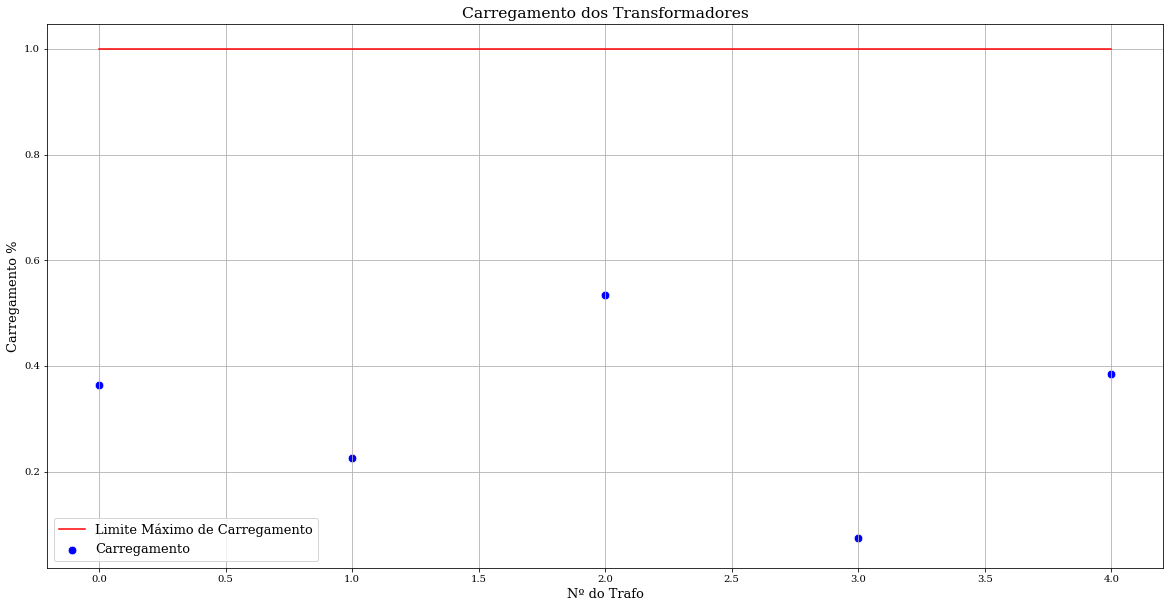

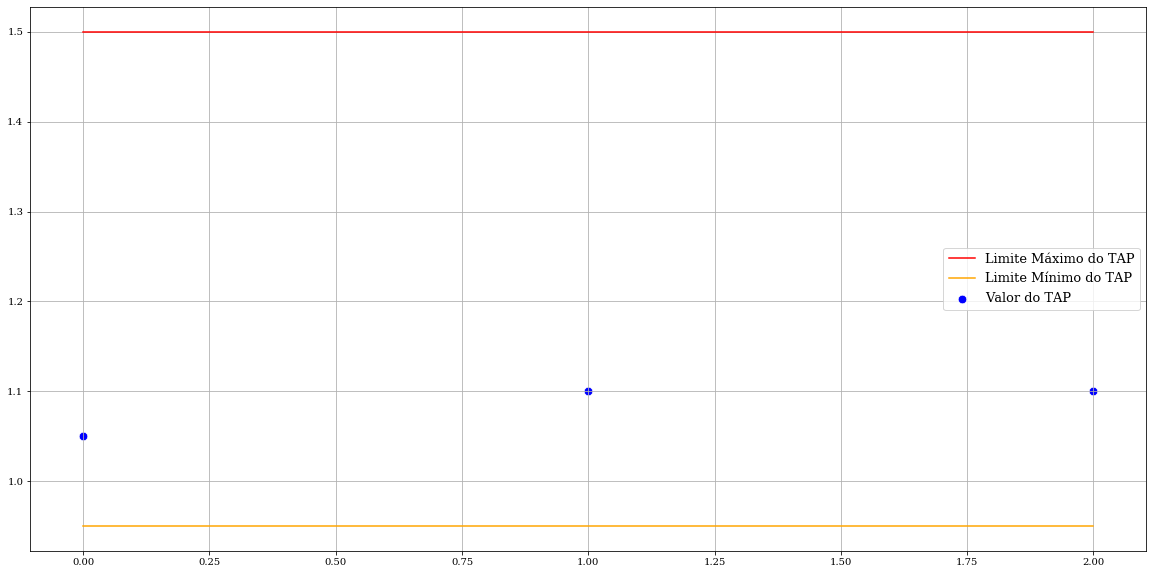

In [371]:
coleta_dados_trafo(sep14,relatorio=True)